# Data Sci Eng Methods
## Comprehensive Analysis and Model Interpretation 
### Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report

## Introduction

- **Defining of Target Variable**: 
    - `total_points`: represents **cumulative points** earned by **FPL players.**


- **Objective Clarification**: 
    - Develop a **ML model** to predict `total_points`.


- **Modeling Goal**: 
    - Identify **factors influencing** `total_points` for team strategy.


- **Evaluation Metrics**: 
    - Assess model **accuracy** and **precision.**


- **Practical Implications**: 
    - Aid in team selection and strategy optimization.

### Data Set Overview

The provided data set captures detailed information related to Fantasy Premier League (FPL) player statistics for seasons spanning 2016 to 2023. This dataset is sourced from Fantasy-Premier-League and encompasses diverse features that contribute to understanding player performance in the English Premier League.


**Key Features:**
- **Player Details:**
  - `season_x`: The season for which the data is recorded.
  - `name`: Player names.
  - `position`: Player positions.
  - `team_x`: The team to which the player belongs.

- **Player Performance Metrics:**
  - A wide range of metrics, including `assists`, `bonus`, `bps`, `clean_sheets`, `creativity`, `influence`, `threat`, and more.
  - `total_points`: The total Fantasy Premier League points earned by the player.

- **Match and Team Details:**
  - Fixture information, kickoff time, minutes played, opponent team details, and scores.

- **Miscellaneous Player Details:**
  - Metrics related to player actions, such as `own_goals`, `penalties_missed`, `penalties_saved`, `red_cards`, `yellow_cards`, etc.

- **Statistical and Outcome Metrics:**
  - `total_points`: The primary dependent variable representing the total Fantasy Premier League points earned by the player.

**Dataset:**
- The dataset comprises **96169 observations**, each capturing a player's performance in various matches.
- Independent variables include a rich set of features, ranging from player statistics and team details to match-related metrics.
- The dependent variable is `total_points`, representing the total Fantasy Premier League points earned by the player.

## Assignment 1:

### What is the question?
   - **The question revolves around:**
     * **exploring the dataset** 
     * **identifying its characteristics**
     * **understanding the relationships between variables.**

### What did you do?


### - Explored the data types (numeric and categorical).

In [1]:
# installing dependencies
!pip install eli5

In [2]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm #For OLS method
import matplotlib.pylab as plt
from matplotlib import pyplot

In [4]:
# Reading the dataset
file_path = r"https://raw.githubusercontent.com/DevjeeVismay/DataScience-Engineering-Methods/main/cleaned_merged_seasons.csv?token=GHSAT0AAAAAACPVM2OEMKKR3Z26Q3WH64EWZQMVQPQ"

# Read the CSV file
data = pd.read_csv(file_path)
data.head()

C:\Users\visma\AppData\Local\Temp\ipykernel_10548\2593328024.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [5]:
# Rename the 'bps' column to 'bonus_points'
data.rename(columns={'bps': 'bonus_points'}, inplace=True)

# Get dimensions of a data 
data.shape

# Get data types 
data.dtypes

season_x              object
name                  object
position              object
team_x                object
assists                int64
bonus                  int64
bonus_points           int64
clean_sheets           int64
creativity           float64
element                int64
fixture                int64
goals_conceded         int64
goals_scored           int64
ict_index            float64
influence            float64
kickoff_time          object
minutes                int64
opponent_team          int64
opp_team_name         object
own_goals              int64
penalties_missed       int64
penalties_saved        int64
red_cards              int64
round                  int64
saves                  int64
selected               int64
team_a_score         float64
team_h_score         float64
threat               float64
total_points           int64
transfers_balance      int64
transfers_in           int64
transfers_out          int64
value                  int64
was_home      

#### Here's a breakdown of the columns into __categorical__ and __numerical data__:

**Categorical Data:**
1. `season_x` (object)
2. `name` (object)
3. `position` (object)
4. `team_x` (object)
5. `kickoff_time` (object)
6. `opp_team_name` (object)
7. `was_home` (bool)

**Numerical Data:**
1. `assists` (int64)
2. `bonus` (int64)
3. `bonus_points` (int64)
4. `clean_sheets` (int64)
5. `creativity` (float64)
6. `element` (int64)
7. `fixture` (int64)
8. `goals_conceded` (int64)
9. `goals_scored` (int64)
10. `ict_index` (float64)
11. `influence` (float64)
12. `minutes` (int64)
13. `opponent_team` (int64)
14. `own_goals` (int64)
15. `penalties_missed` (int64)
16. `penalties_saved` (int64)
17. `red_cards` (int64)
18. `round` (int64)
19. `saves` (int64)
20. `selected` (int64)
21. `team_a_score` (float64)
22. `team_h_score` (float64)
23. `threat` (float64)
24. `total_points` (int64)
25. `transfers_balance` (int64)
26. `transfers_in` (int64)
27. `transfers_out` (int64)
28. `value` (int64)
29. `yellow_cards` (int64)
30. `GW` (int64)

This categorization is based on the data types of each column. Columns with data type `object` are considered categorical, while columns with data types `int64`, `float64`, and `bool` are considered numerical.

### - Checked for missing values.

In [6]:
data.rename(columns={'team_x': 'team_name'}, inplace=True)

# checking if the any data is missing
data.isnull().sum()

season_x                 0
name                     0
position                 0
team_name            19852
assists                  0
bonus                    0
bonus_points             0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

#### Handling missing values.

In [7]:
# Making a copy of the data
df = data.copy()

# Dropping the rows with 'team_name' as null
df.dropna(subset=["team_name"], inplace=True)

df.isnull().sum()

season_x             0
name                 0
position             0
team_name            0
assists              0
bonus                0
bonus_points         0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
kickoff_time         0
minutes              0
opponent_team        0
opp_team_name        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
GW                   0
dtype: int64

#### Removing 20.64% of Data
which is **19852 Rows** of **96169 Rows** which has **Team Name missing.**  

### - Assessed likely distributions of numeric variables 
 **Identified Skewness**

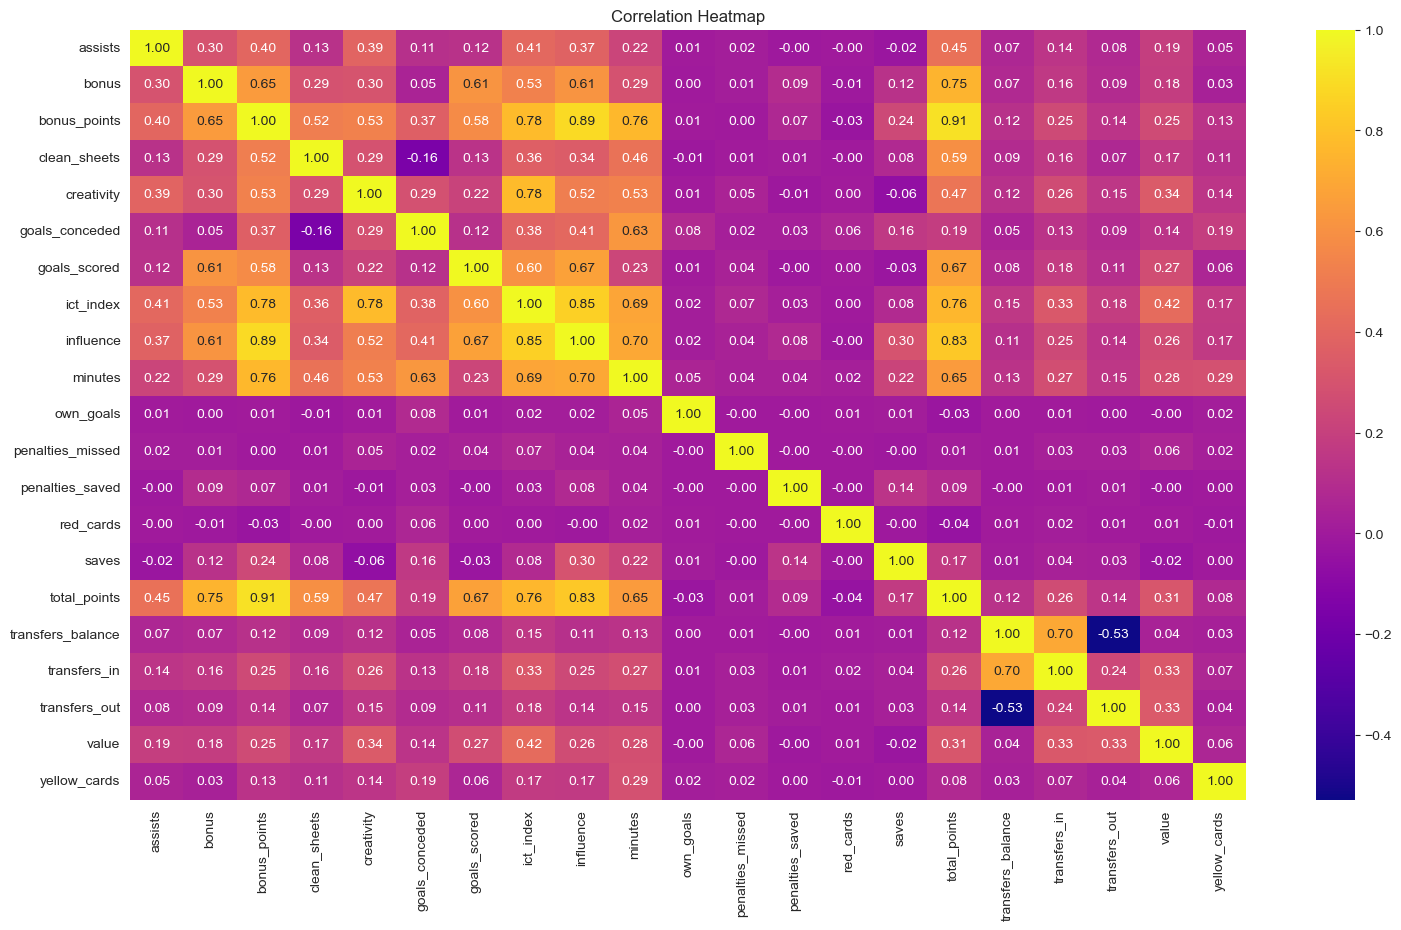

In [32]:
# Assigned Numeric variables to variable 'col'
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

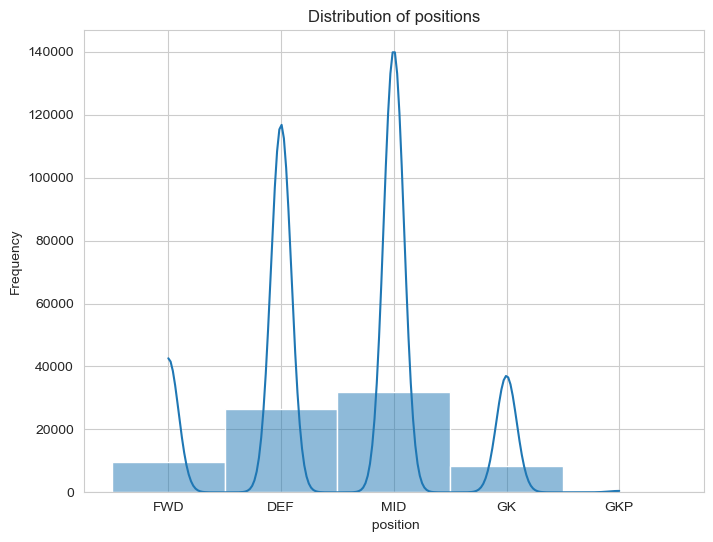

In [33]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='position', bins=5, kde=True)
plt.xlabel(' position')
plt.ylabel('Frequency')
plt.title('Distribution of positions')
plt.show()

**Visualizing Distribution of players based on position**

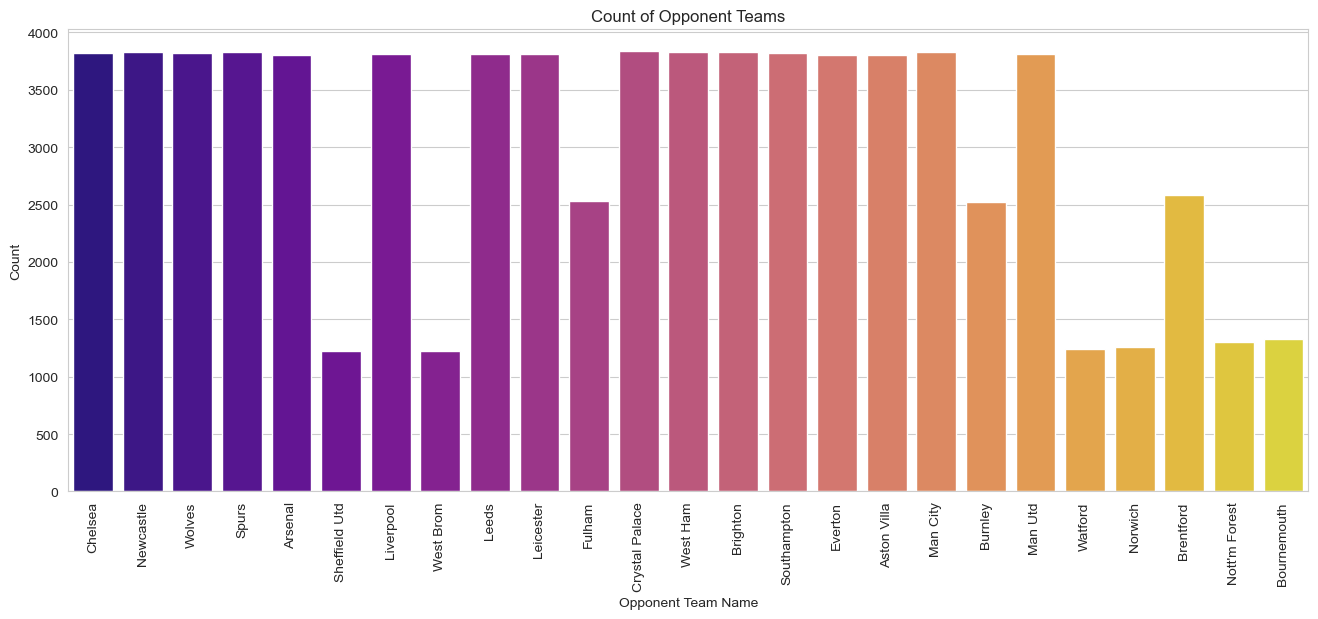

In [34]:
color_palette = "plasma"

plt.figure(figsize=(16, 6))  
sns.countplot(data=df, x='opp_team_name',palette=color_palette)

plt.xticks(rotation=90)
plt.xlabel('Opponent Team Name')
plt.ylabel('Count')
plt.title('Count of Opponent Teams')
plt.show()

**Visualizing Distribution of players based on Opponent Team**

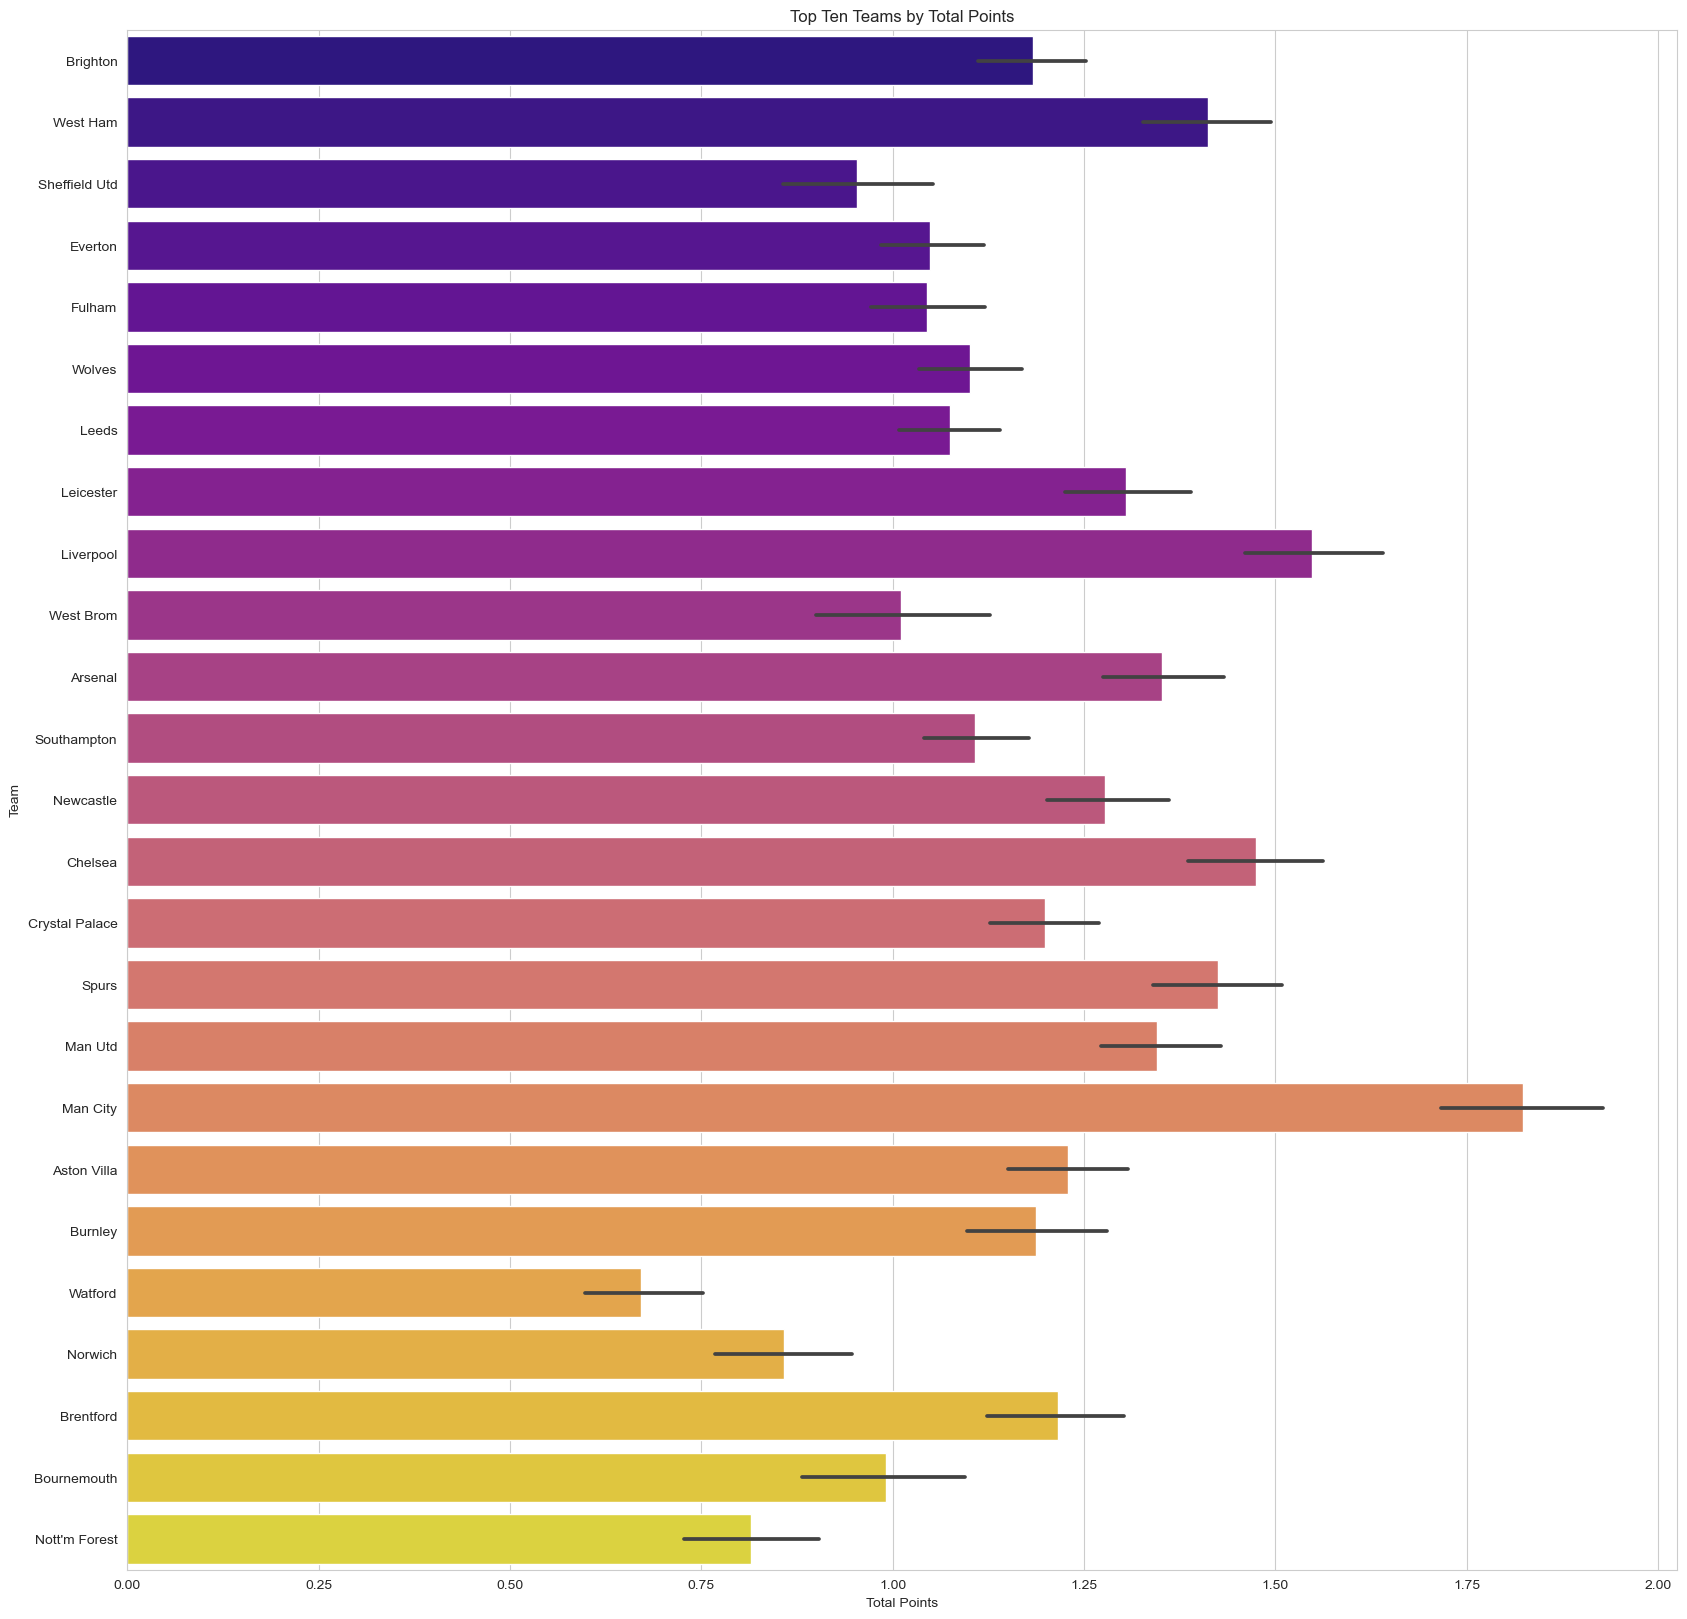

In [35]:
color_palette = "plasma"

# Create the bar plot
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='total_points', y='team_name', palette=color_palette)

plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Top Ten Teams by Total Points')
plt.show()

**Visualizing Top Team based on Points**

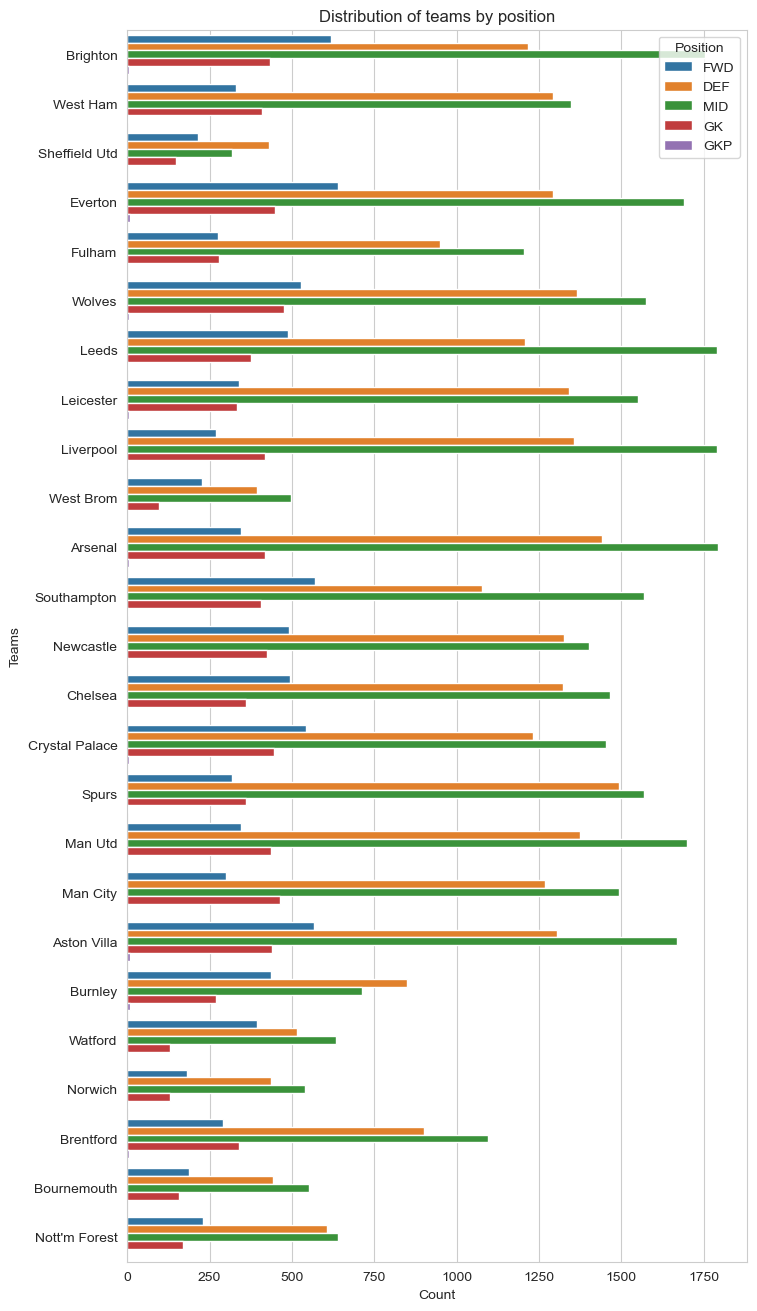

In [36]:
plt.figure(figsize=(8, 16))  # Set the figure size

# Create the count plot
sns.countplot(data=df, y="team_name", hue="position")

# Set title and labels
plt.title("Distribution of teams by position")
plt.xlabel("Count")
plt.ylabel("Teams")

# Add legend
plt.legend(title="Position", loc="upper right")

# Show the plot
plt.show()

**Visualizing Distribution of players position based on teams**

### - Do the training and test sets have the same data?

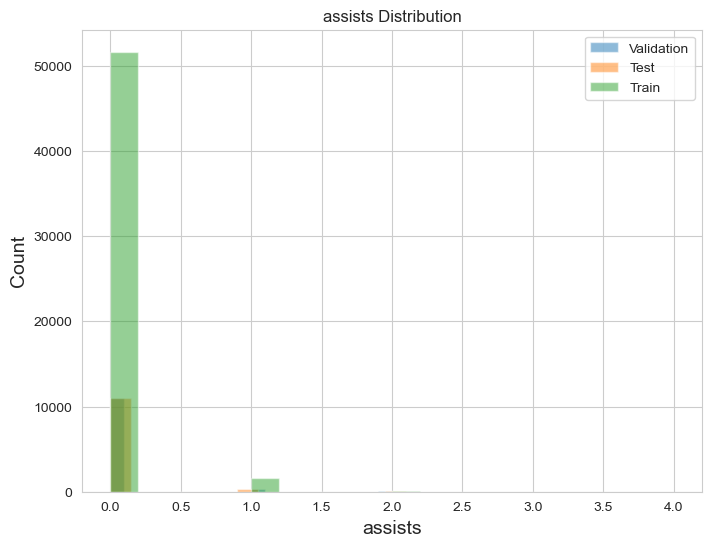

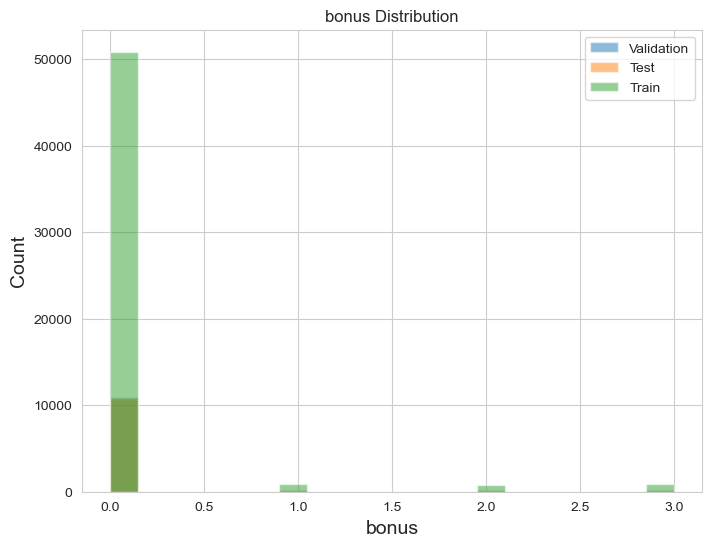

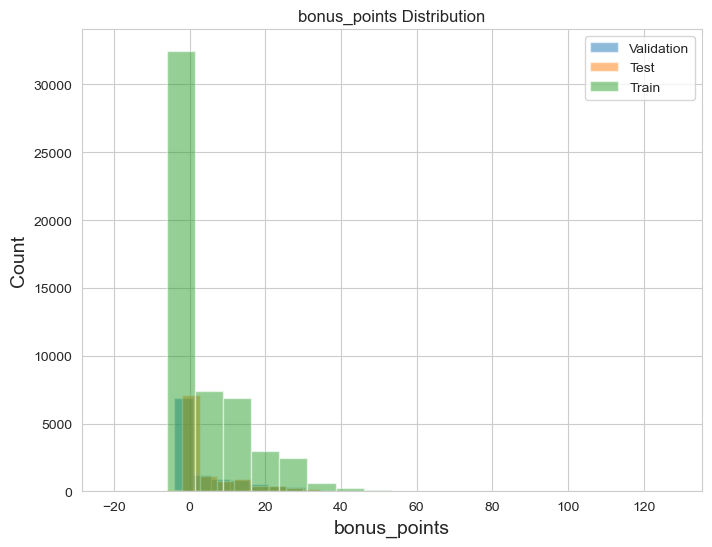

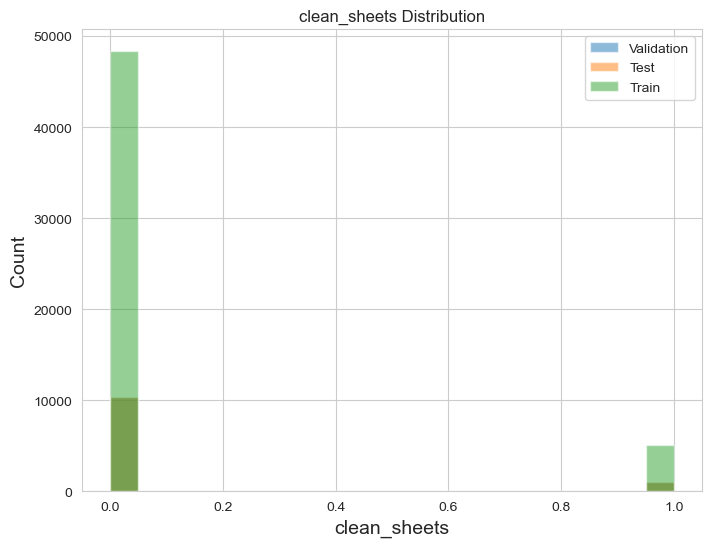

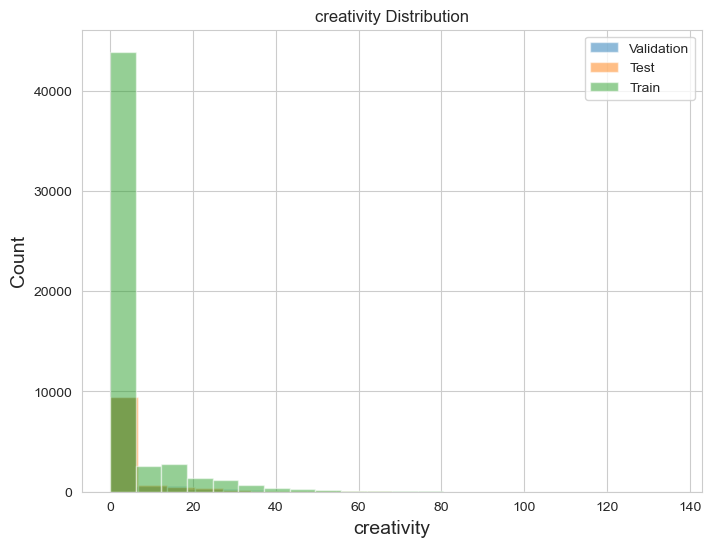

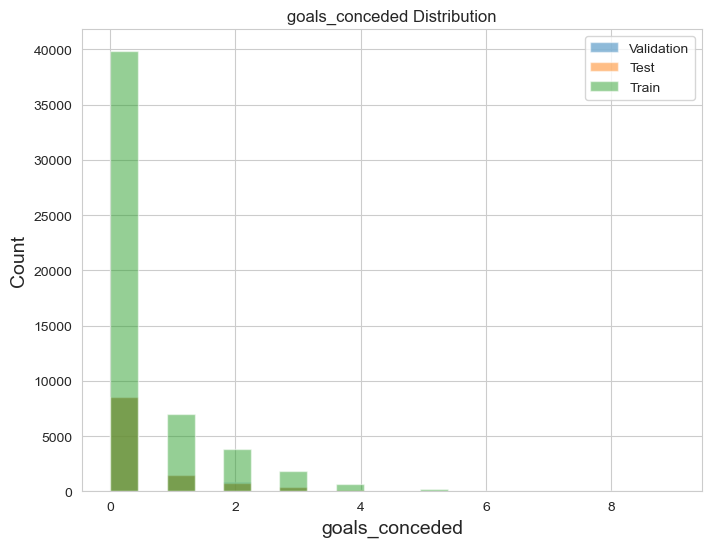

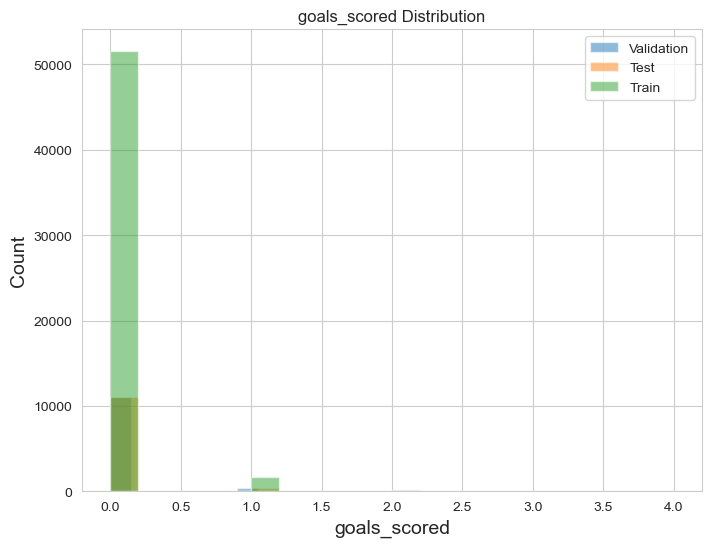

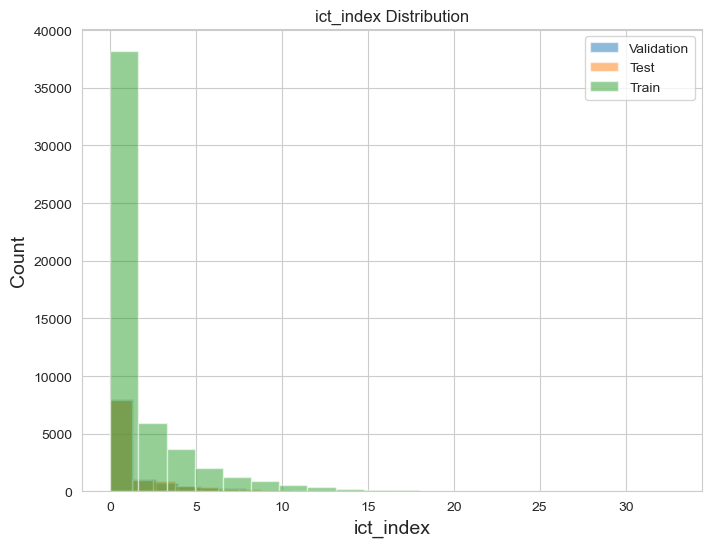

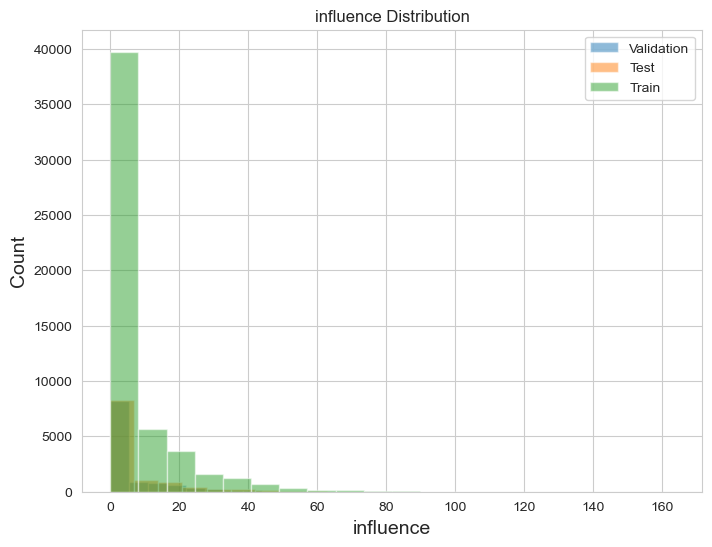

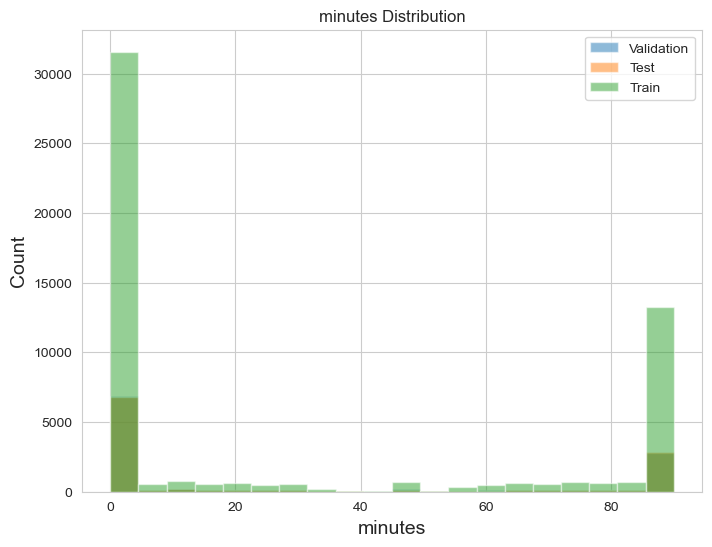

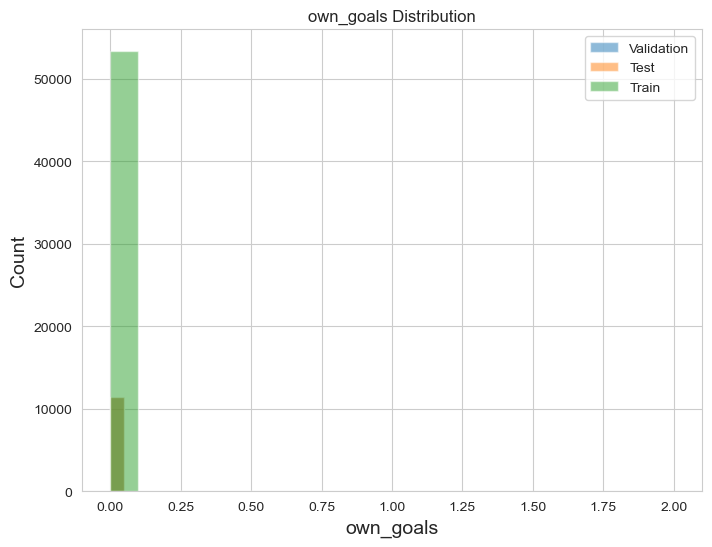

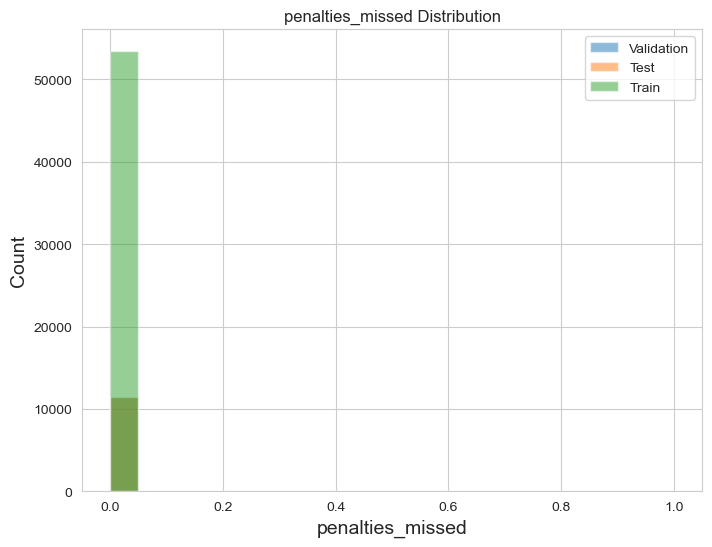

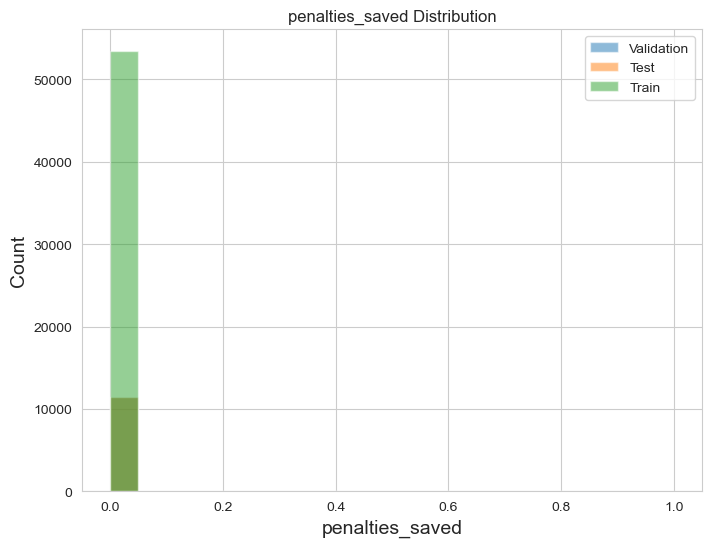

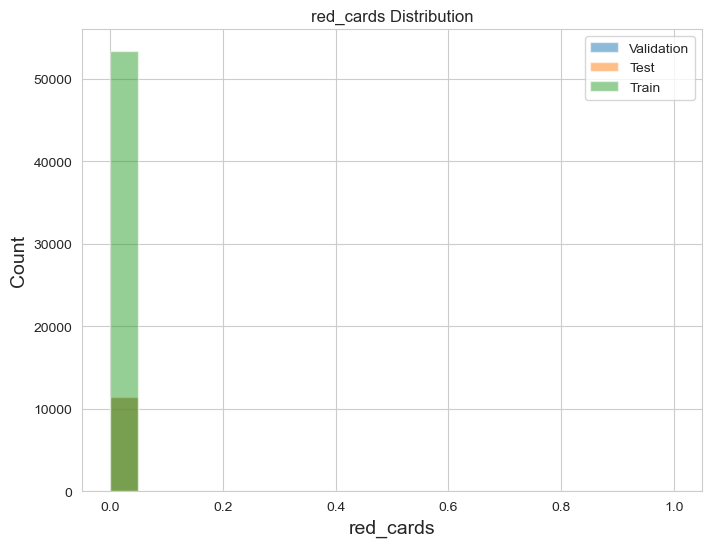

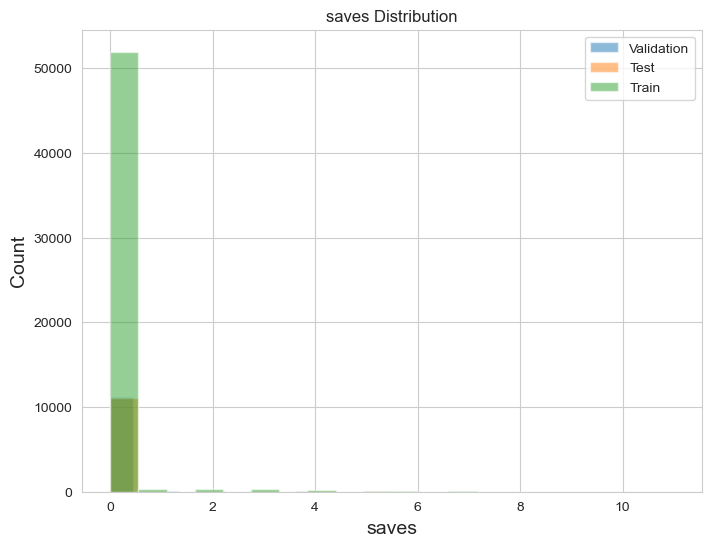

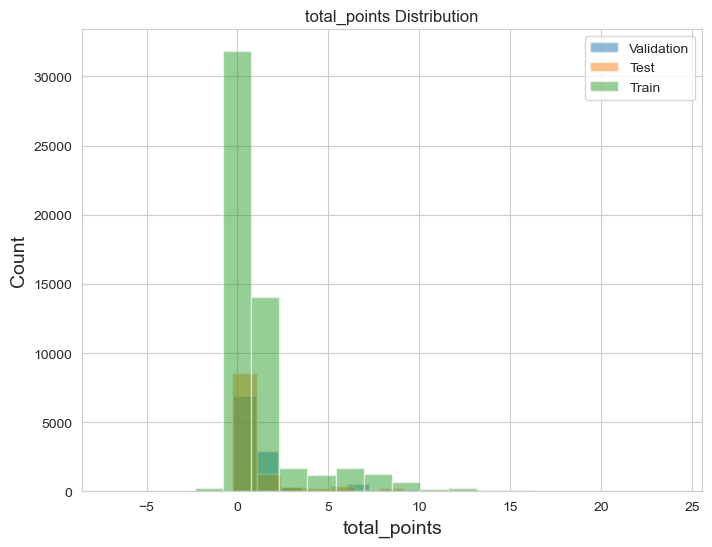

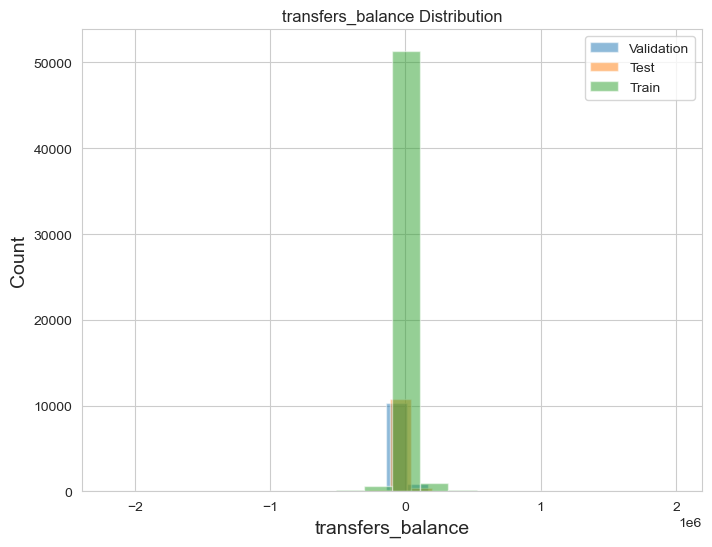

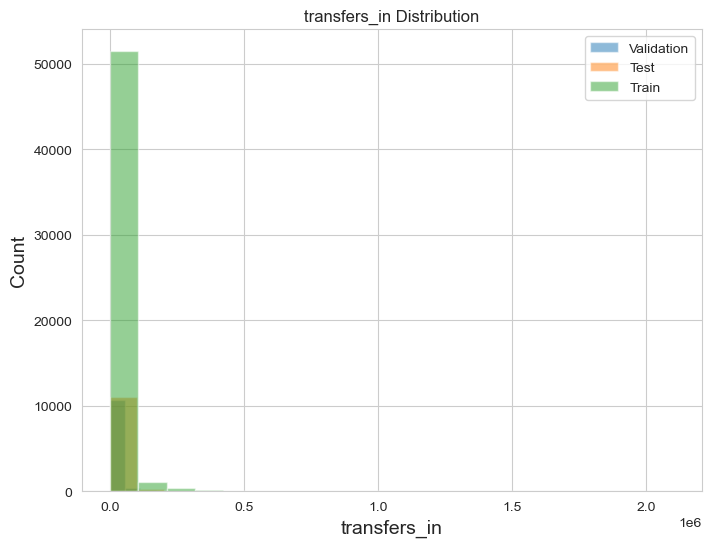

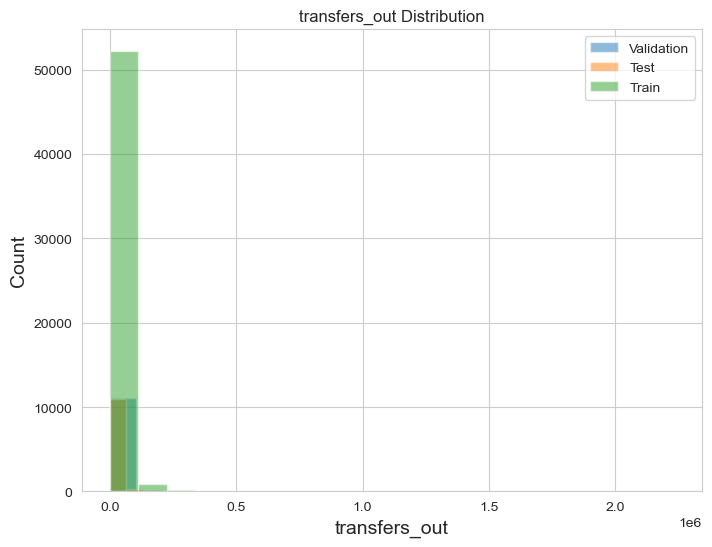

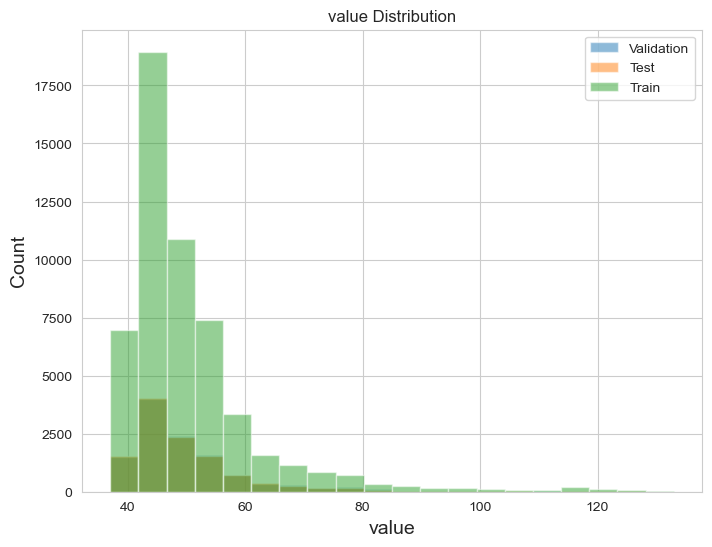

In [37]:
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value']

from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df[cols]
y = df['total_points']

# Split the data into training (70%) and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Plotting the data distributions for training, validation, and test sets
for c in X_train.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val[c], bins=20, alpha=0.5, label="Validation")
    plt.hist(X_test[c], bins=20, alpha=0.5, label="Test")
    plt.hist(X_train[c], bins=20, alpha=0.5, label="Train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title(f"{c} Distribution")
    plt.show()

###  - Assessed independence among predictor variables.

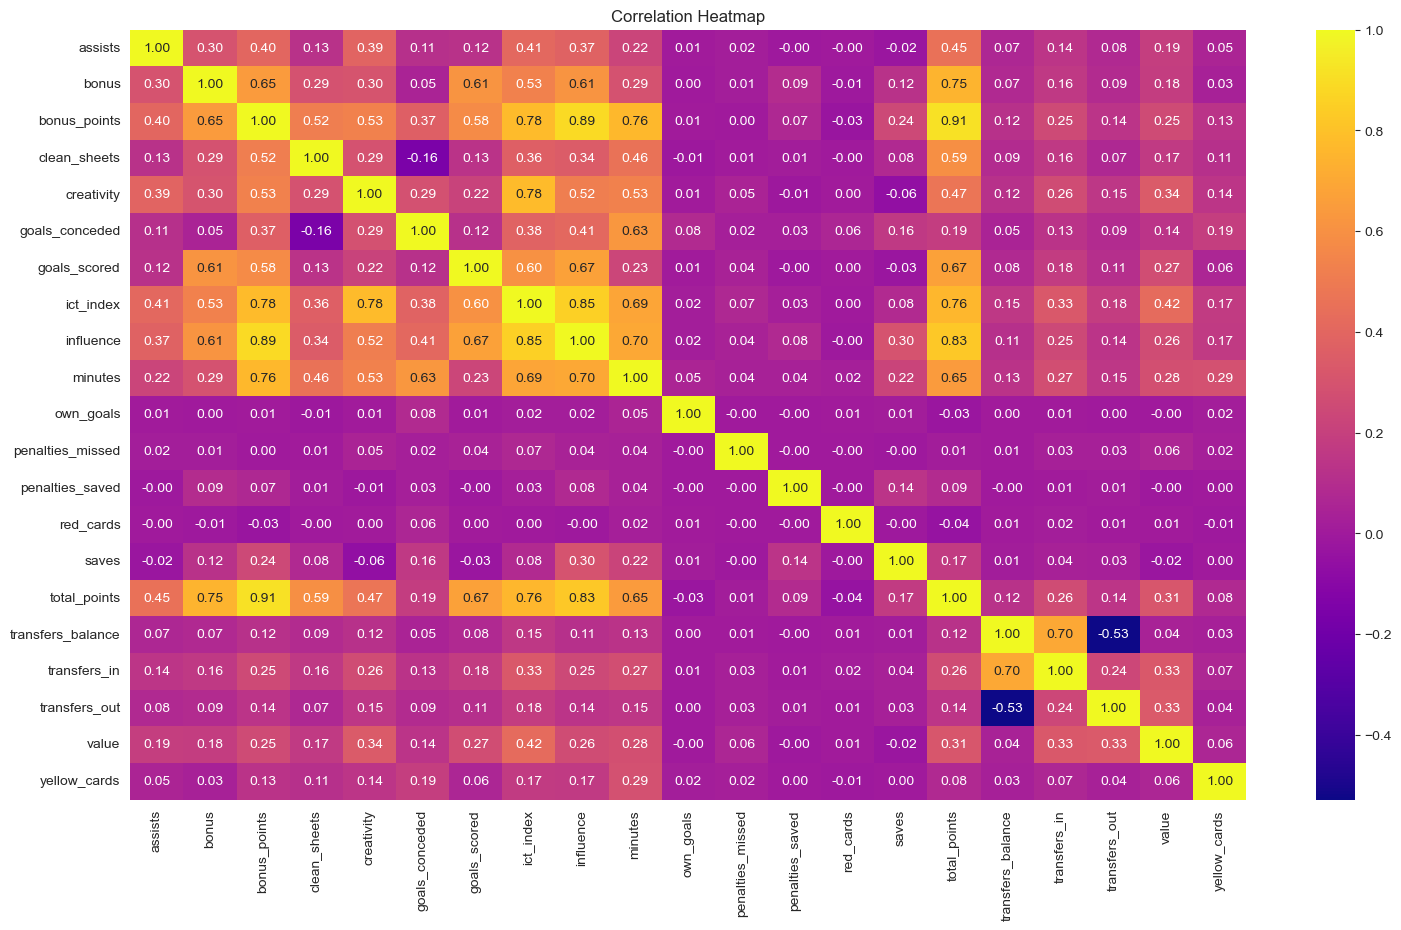

In [38]:
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Based on the correlation matrix, we cannot conclude whether predictor variables are independent of all the other predictor variables. 
To determine independence, we would need to conduct __Multicollinearity Analysis__

#### For which we perform:
* __Calculate Correlation Matrix__ : This matrix will show how each variable correlates with every other variable.
* __Variance Inflation Factor (VIF) Analysis__ : VIF quantifies the severity of multicollinearity in a regression model. 

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame containing predictor variables
# Drop any non-numeric columns if present
numeric_df = df.select_dtypes(include=[np.number])

# Add a constant term for the intercept
X = add_constant(numeric_df)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns

# Calculate VIF, handling division by zero
vif["VIF"] = [variance_inflation_factor(X.values, i) if i != 0 else np.nan for i in range(X.shape[1])]

print(vif)

C:\Users\visma\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Variable           VIF
0               const           NaN
1             assists  2.356847e+00
2               bonus  3.184216e+00
3        bonus_points  1.395634e+01
4        clean_sheets  3.234775e+00
5          creativity  9.669350e+02
6             element  1.065026e+00
7             fixture  1.465194e+01
8      goals_conceded  3.412752e+00
9        goals_scored  6.313472e+00
10          ict_index  7.807625e+03
11          influence  1.428276e+03
12            minutes  9.302598e+00
13      opponent_team  1.008743e+00
14          own_goals  1.034793e+00
15   penalties_missed  1.022242e+00
16    penalties_saved  1.070012e+00
17          red_cards  1.052168e+00
18              round           inf
19              saves  1.540994e+00
20           selected  1.989467e+00
21       team_a_score  1.133823e+00
22       team_h_score  1.162763e+00
23             threat  1.482165e+03
24       total_points  2.143819e+01
25  transfers_balance  8.376871e+05
26       transfers_in  6.396

### Based on the VIF (Variance Inflation Factor) result:

1. **High VIF (> 10)**: Variables like `ict_index`, `influence`, `creativity`, `fixture`, `total_points`, `transfers_balance`, `transfers_in`, `transfers_out`, and `GW` exhibit strong multicollinearity with other predictors. Further investigation is needed to assess their impact on the model.

2. **Moderate VIF (5 - 10)**: `goals_scored` shows moderate multicollinearity, suggesting some impact on the model but less severe than high VIF variables.

3. **Low VIF (< 5)**: Variables such as `assists`, `bonus`, `clean_sheets`, `element`, `goals_conceded`, `minutes`, `opponent_team`, `own_goals`, `penalties_missed`, `penalties_saved`, `red_cards`, `saves`, `selected`, `team_a_score`, `team_h_score`, `threat`, `value`, and `yellow_cards` exhibit acceptable levels of multicollinearity.

4. **VIF of Infinity**: `round` and `GW` show perfect multicollinearity, necessitating investigation into data or model specification issues.

### - Determined the most important predictor variable!
#### Using OLS

In [40]:
import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame called 'data'

# Define the target variable
target_variable = 'total_points'  # Replace with your correct target variable

# Define the independent variables
independent_variables = ['bonus_points', 'bonus', 'goals_scored', 'minutes', 'influence', 'clean_sheets', 'assists', 'creativity', 'goals_conceded', 'ict_index']

# Create the OLS model
model = sm.OLS(df[target_variable], df[independent_variables]).fit()

# Print the model summary with p-values and other statistics
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:           total_points   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.663e+05
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:38:32   Log-Likelihood:                         -65474.
No. Observations:               76317   AIC:                                  1.310e+05
Df Residuals:                   76307   BIC:                                  1.311e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Rank:

1. **goals_scored**
2. **assists**
3. **bonus**
4. **bps**
5. **ict_index**
6. **clean_sheets**
7. **minutes**
8. **goals_conceded**
9. **creativity**
10. **influence**

### - Evaluated the ranges and distributions.

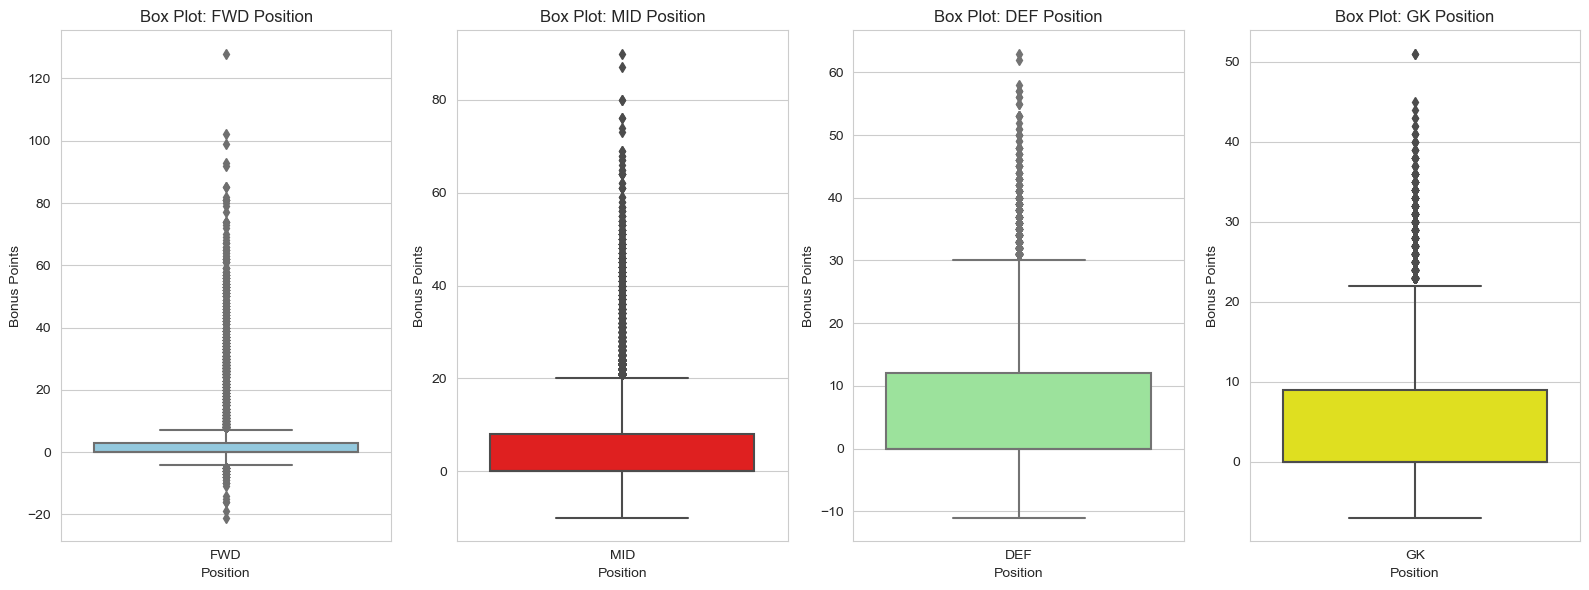

In [41]:
# Create a figure and axis object with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Define the positions and corresponding colors
positions = ['FWD', 'MID', 'DEF', 'GK']
colors = ['skyblue', 'red', 'lightgreen', 'yellow']

# Iterate through positions and create box plots with specified colors
for i, (position, color) in enumerate(zip(positions, colors)):
    # Filter the DataFrame for the current position
    df_position = df[df['position'] == position]
    
    # Create the box plot for the current position with specified color
    sns.boxplot(x='position', y='bonus_points', data=df_position, ax=axes[i], color=color)
    
    # Set title for each subplot
    axes[i].set_title(f'Box Plot: {position} Position')
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel('Bonus Points')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

 **The ranges of the predictor variables in the graph generally make sense.**

**Breakdown of the graph:**

**Box Plots:**

- The graph consists of four box plots, one for each player position in a sport (FWD, MID, DEF, GK).
- Box plots effectively visualize the distribution of a variable, including its central tendency, spread, and potential outliers.

**Predictor Variables:**

- The predictor variable in this case appears to be __"Bonus Points."__
- The box plots show the distribution of bonus points awarded for each position.

**Ranges:**

- **FWD and MID:** The ranges for FWD and MID positions are relatively wide, suggesting variability in bonus points for these positions. This makes sense as these positions often have more opportunities to score or contribute to scoring plays, which can lead to higher bonus point potential.
- **DEF and GK:** The ranges for DEF and GK positions are narrower, indicating less variability in bonus points. This aligns with the defensive nature of these positions, which typically score fewer goals or assists and therefore have a smaller bonus point range.

**Overall:**

- The ranges observed in the box plots align with typical expectations for bonus points in different positions within the sport.
- They suggest that the data is generally capturing the expected patterns of bonus point distribution.

### - Investigated the effect of outliers on the predictive model.

**Regression with Outliers**

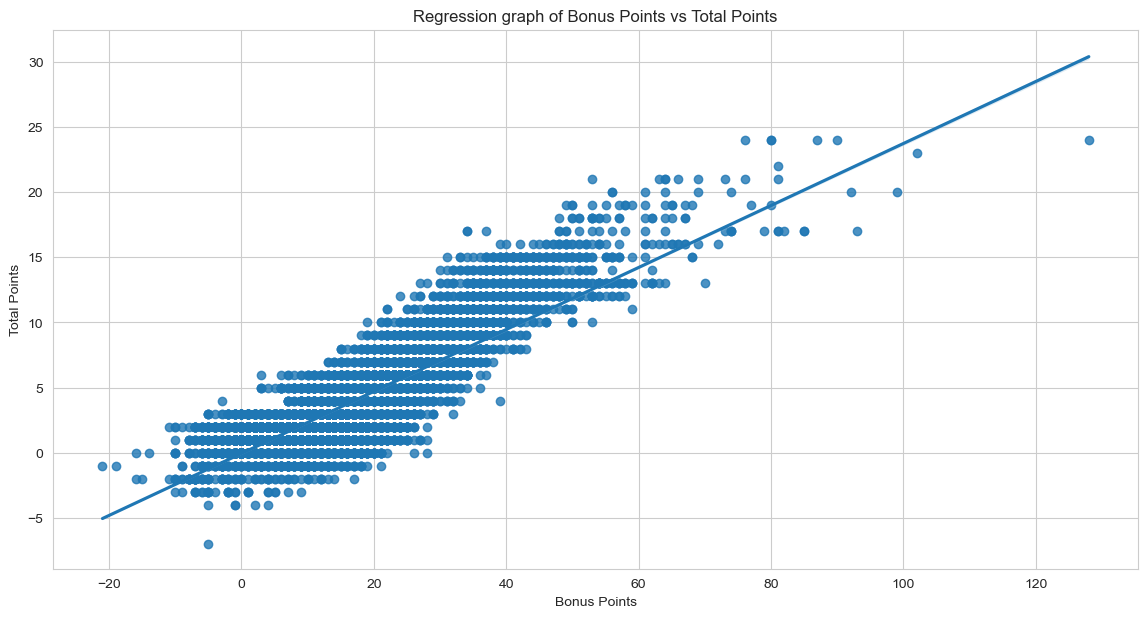

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph
sns.regplot(x='bonus_points', y='total_points', data=df)
plt.title('Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.show()

**Regression without Outliers**

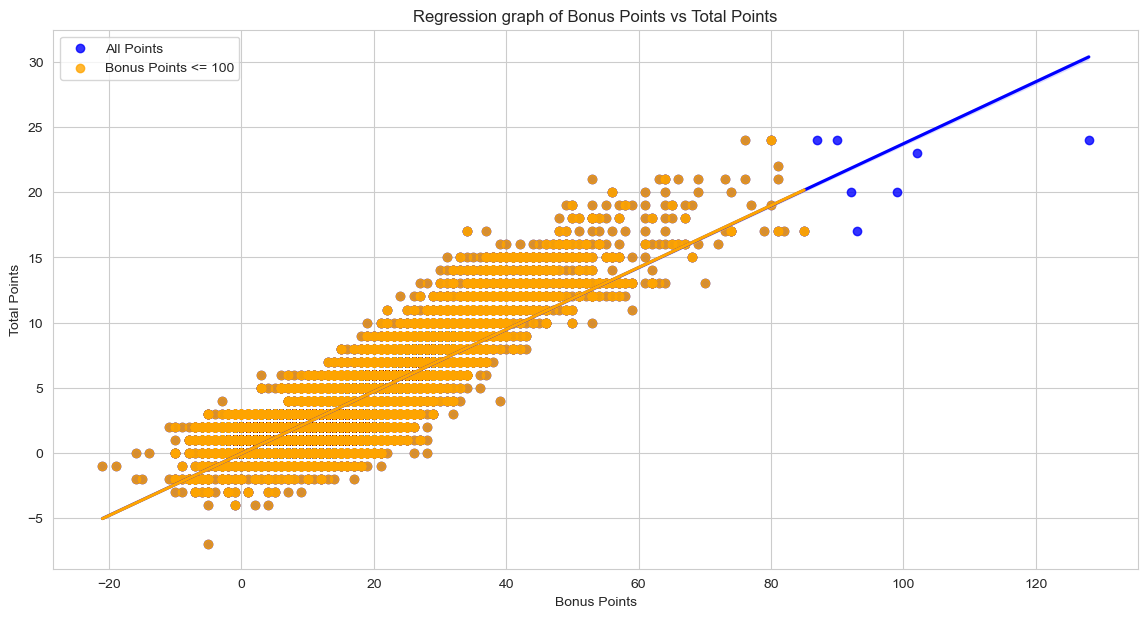

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph with all data
sns.regplot(x='bonus_points', y='total_points', data=df, color='blue', label='All Points')

# Filter the DataFrame to exclude values above 100 on the x-axis
df_filtered = df[df['bonus_points'] <= 85]

# Plotting the regression graph for filtered data
sns.regplot(x='bonus_points', y='total_points', data=df_filtered, color='orange', label='Bonus Points <= 100')

plt.title('Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.legend()
plt.show()

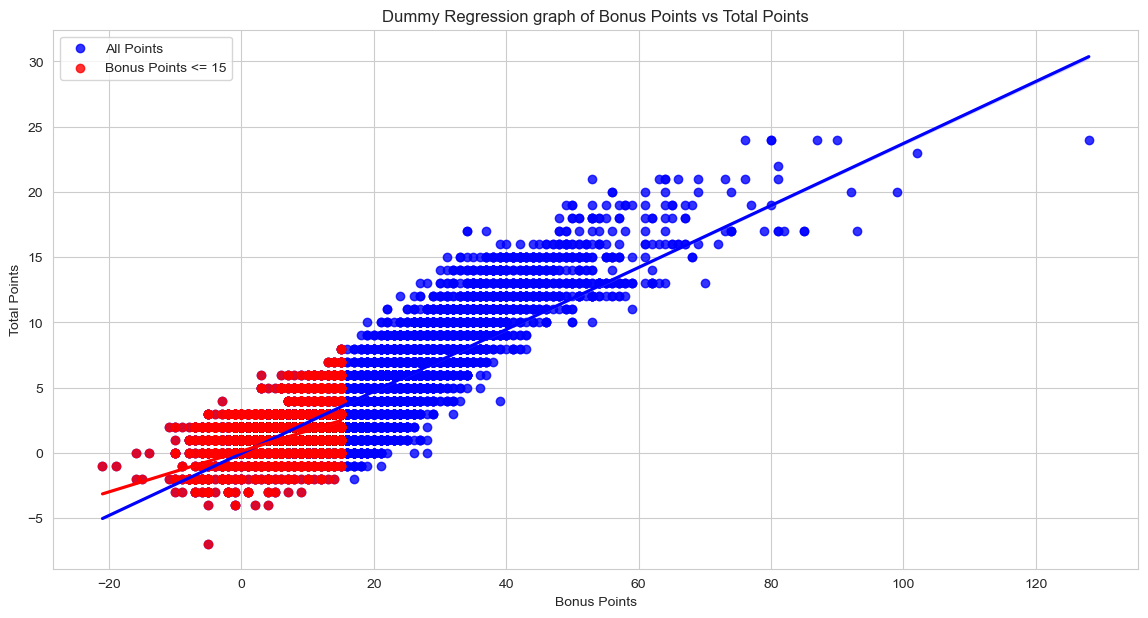

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph with all data
sns.regplot(x='bonus_points', y='total_points', data=df, color='blue', label='All Points')

# Filter the DataFrame to exclude values above 100 on the x-axis
df_filtered = df[df['bonus_points'] <= 15]

# Plotting the regression graph for filtered data
sns.regplot(x='bonus_points', y='total_points', data=df_filtered, color='red', label='Bonus Points <= 15')

plt.title('Dummy Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.legend()
plt.show()

### As we can see the bonus points data is distributed heavily between -20 to 80. Thus excluding the outliers has no effect on the regression line.


__To show that the regression line is affected as more data is deselected an dummy graph showing outliers as anything above 15 displays a slight change in the angle of regression line.
Note this is just an example.__

###  - Examined the impact of random data removal and imputation methods on model performance.

In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Make a copy of the original DataFrame
df_copy = df.copy()

# Separate numeric and non-numeric columns
numeric_columns = df_copy.select_dtypes(include=np.number).columns
non_numeric_columns = df_copy.select_dtypes(exclude=np.number).columns

# Define the percentages of data to remove
percentages = [0.01, 0.05, 0.1]

# Define imputation methods
imputation_methods = ['mean', 'median', 'knn']

# Initialize dictionaries to store results
mse_results = {}
percent_error_results = {}

# Iterate through each percentage of data to remove
for percent in percentages:
    # Randomly select indices to remove
    np.random.seed(42)  # Set random seed for reproducibility
    num_rows = df_copy.shape[0]
    num_to_remove = int(percent * num_rows)
    indices_to_remove = np.random.choice(df_copy.index, num_to_remove, replace=False)
    
    # Remove selected rows
    df_copy.loc[indices_to_remove, numeric_columns] = np.nan
    
    # Initialize dictionaries to store results for each imputation method
    mse_results[percent] = {}
    percent_error_results[percent] = {}
    
    # Iterate through each imputation method
    for method in imputation_methods:
        # Initialize imputer based on the chosen method
        if method == 'knn':
            imputer = KNNImputer(n_neighbors=5)
        else:
            imputer = SimpleImputer(strategy=method)
        
        # Impute missing values only for numeric columns
        df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_copy[numeric_columns]), columns=numeric_columns)
        
        # Calculate mean squared error only for imputed columns
        mse = mean_squared_error(df[numeric_columns], df_numeric_imputed)
        mse_results[percent][method] = mse
        
        # Calculate percentage error only for imputed columns
        percent_error = np.abs((df[numeric_columns] - df_numeric_imputed) / df[numeric_columns]) * 100
        percent_error_results[percent][method] = percent_error.mean()

# Print results
for percent in percentages:
    print(f'Percentage of data removed: {percent * 100}%')
    for method in imputation_methods:
        print(f'Imputation method: {method}')
        print(f'Mean Squared Error: {mse_results[percent][method]}')
        print(f'Average Percentage Error: {percent_error_results[percent][method]}')


Percentage of data removed: 1.0%
Imputation method: mean
Mean Squared Error: 97322938.85116439
Average Percentage Error: assists                     inf
bonus                       inf
bonus_points                inf
clean_sheets                inf
creativity                  inf
element              312.823919
fixture              484.995044
goals_conceded              inf
goals_scored                inf
ict_index                   inf
influence                   inf
minutes                     inf
opponent_team        135.385192
own_goals                   inf
penalties_missed            inf
penalties_saved             inf
red_cards                   inf
round                280.886950
saves                       inf
selected                    inf
team_a_score                inf
team_h_score                inf
threat                      inf
total_points                inf
transfers_balance           inf
transfers_in                inf
transfers_out               inf
value          

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
        'goals_conceded', 'goals_scored', 'ict_index', 'influence',
        'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
        'red_cards', 'saves', 'transfers_balance', 'transfers_in',
        'transfers_out', 'value', 'yellow_cards']]

# Extract the target column into y
y = df['total_points']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regr = LinearRegression()

# Train the model
regr.fit(X_train, y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print("Mean squared error on training set:", mse)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set:", r2)

Mean squared error on training set: 0.27791410152089163
R^2 score on training set: 0.952726507040945


## How well did it work?

### Conclusion 

| Missing data % | Imputation method |Mean Squared Error| Bias | Variance |
|---|---|---|---|---|
| 1% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 1% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 1% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |

As we can see, the **mean squared error (MSE)** is **relatively low for all three imputation methods, even when 10% of the data is missing.** This suggests that the **imputation methods** are able to **recover the missing values** reasonably well.

The **bias** is also **small for all three methods**, which means that the **imputed values are not systematically over or underestimating the true values.**

The **variance** is also **small** for all three methods, which means that the **imputed values** are **not too spread out.**

## **What did you learn?**

* Explored data using techniques such as **handling missing data, assessing variable distributions**, and **identifying important predictors.**
* Evaluated the **impact of outliers** and **data manipulation** on model performance.
* Gained insights into data exploration techniques and their significance in **building predictive models.**

## Assignment 2:

### What is the question?

The question revolves around:
- Evaluating the effectiveness and appropriateness of a **multivariate model** in predicting outcomes
- Considering factors such as **significance of relationships** 
- Adherence to **model assumptions** & presence of multicollinearity 
- Significance of **independent variables** 
- The impact of **regularization** and **hyperparameters.**

### What did you do?

### - Examined the statistical significance of relationships

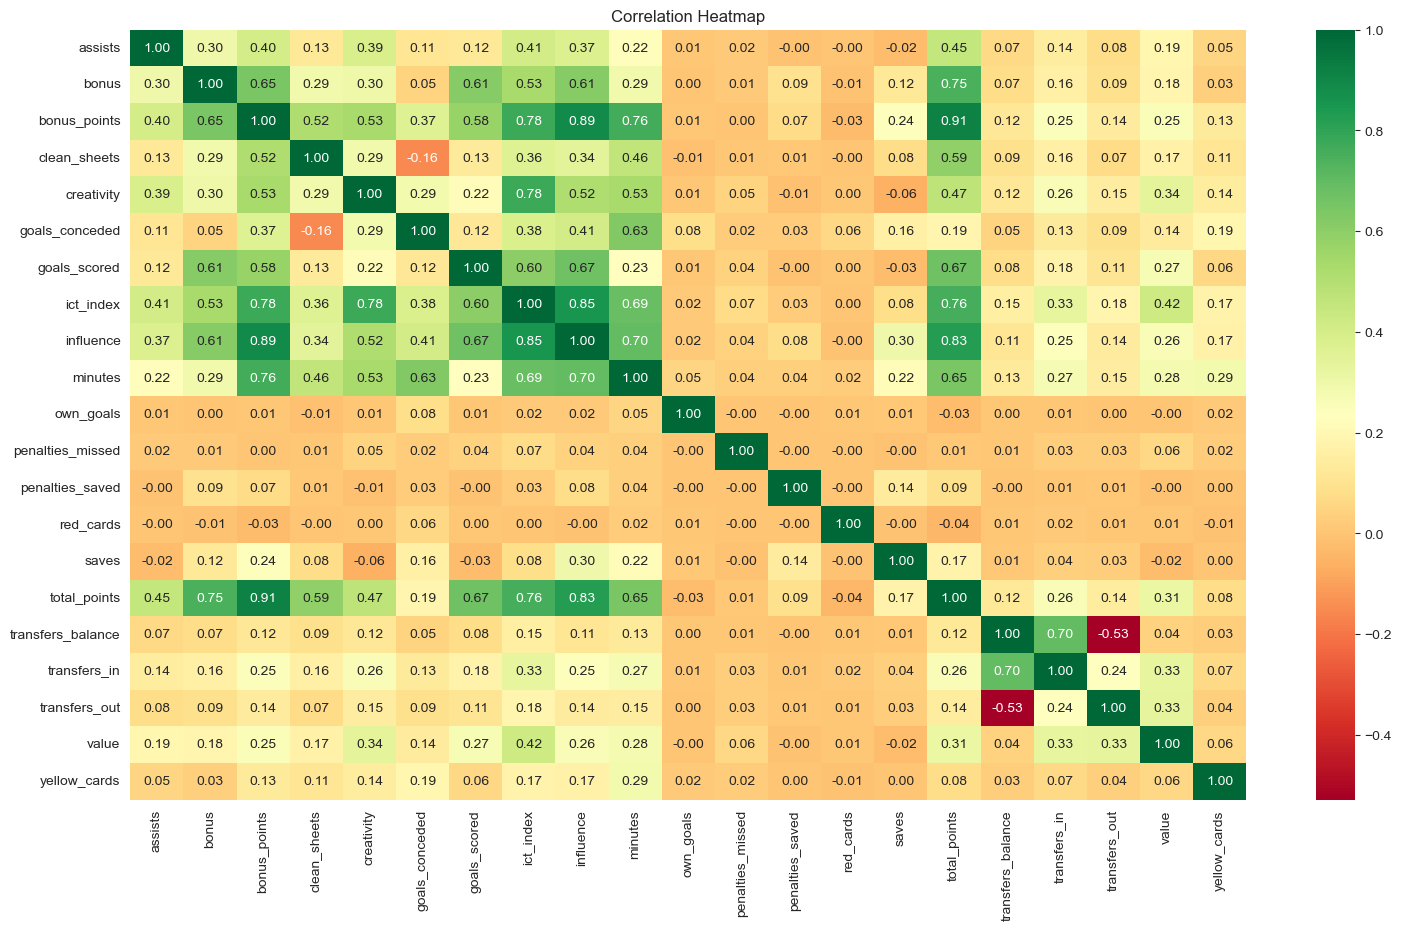

In [23]:
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Analysing the Correlation Heatmap:

The correlations between the variables and the target variable "total_points":

**Strong Positive Correlations:**

* `minutes`: Players who play more minutes tend to score more points (moderate positive correlation).
* `bonus`: Higher bonus points often indicate good performances, leading to more total points (strong positive correlation).
* `bps`: Similar to bonus points, higher BPS also suggests better performance and, therefore, more total points (strong positive correlation).
* `goals_scored`: Goals directly contribute to points, resulting in a strong positive correlation.
* `assists`: Assisting goals also helps players earn points, leading to a strong positive correlation.
* `ict_index`: This index combines various attacking and defensive actions, and a higher index likely indicates more contributions to the team and potentially more points (strong positive correlation).
* `influence`: Similar to ict_index, higher influence suggests a greater impact on the game and potentially more points (strong positive correlation).

**Other Notable Correlations:**

* `clean_sheets`: Goalkeepers with clean sheets might score fewer points due to their defensive role, but the correlation here is weak positive.
* `creativity`: Offensive contributions beyond direct goals and assists seem to have a moderate positive correlation with total points.
* `team_scores`: Higher scoring matches (both teams) might lead to more individual points, although the correlations are moderate.
* `transfers`: These variables have varying correlations with total points, possibly indicating complex relationships with player performance and value changes.


### - Assessed adherence to model assumptions such as linearity, normality, and homoscedasticity.

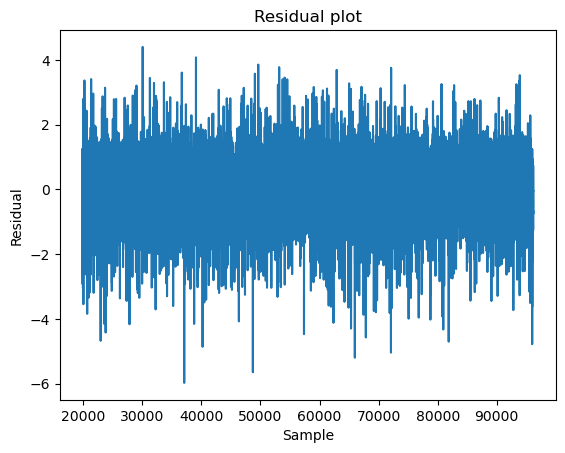

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
        'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
        'influence', 'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
        'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
        'team_a_score', 'team_h_score', 'threat', 'transfers_balance',
        'transfers_in', 'transfers_out', 'value', 'yellow_cards']]
y = df['total_points']

# Convert X to a NumPy array
X = X.to_numpy()

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Residual plot
plt.plot(model.resid)
plt.xlabel("Sample")
plt.ylabel("Residual")
plt.title("Residual plot")
plt.show()

### Models asumptions violated:

**Observations:**

* **Scattered residuals:** The residuals are mostly scattered randomly around the zero line, indicating no obvious patterns or trends. This is a good sign, as it suggests that the linear regression __model's assumptions of linearity and homoscedasticity are not grossly violated.__
* **Range of residuals:** Most residuals fall within the range of -2 to 2, though a few outliers extend beyond this range. The specific meaning of this range depends on the scale of your dependent variable ("total_points"). If "total_points" typically ranges from 0 to 100, then residuals within -2 and 2 are relatively small. However, if "total_points" ranges from -1000 to 1000, then even residuals within this range might be significant.
* **Outliers:** There are a few outliers with larger residuals, particularly towards the right side of the plot. These outliers could indicate influential data points that might be worth investigating further.

**Overall:**

The residual plot suggests that the __linear regression model is a decent fit for the data__, but there might be some room for improvement.

###  - Investigated the presence of multicollinearity among predictor variables.

Based on the heatmap provided above, there are a few pairs of features that exhibit **moderately high** correlations, but it's difficult to definitively say there's multicollinearity in the model. Here's a breakdown of what I observed:

**Moderately high correlations:**

* **transfers_out** and **transfers_balance** (0.70)
* **transfers_in** and **transfers_balance** (0.53)
* **minutes** and **goals_conceded** (0.52)
* **minutes** and **goals_scored** (0.53)
* **ict_index** and **influence** (0.67)

These correlations are above 0.5, indicating some level of redundancy between the variables. 

However, they are not close to 1, which would be a stronger sign of multicollinearity.

__VIF Method for cross checking the multicollinearity in the model__

VIF has been performed above.
### Based on the VIF (Variance Inflation Factor) result:

1. **High VIF (> 10)**: Variables like `ict_index`, `influence`, `creativity`, `fixture`, `total_points`, `transfers_balance`, `transfers_in`, `transfers_out`, and `GW` exhibit strong multicollinearity with other predictors. Further investigation is needed to assess their impact on the model.

2. **Moderate VIF (5 - 10)**: `goals_scored` shows moderate multicollinearity, suggesting some impact on the model but less severe than high VIF variables.

3. **Low VIF (< 5)**: Variables such as `assists`, `bonus`, `clean_sheets`, `element`, `goals_conceded`, `minutes`, `opponent_team`, `own_goals`, `penalties_missed`, `penalties_saved`, `red_cards`, `saves`, `selected`, `team_a_score`, `team_h_score`, `threat`, `value`, and `yellow_cards` exhibit acceptable levels of multicollinearity.

4. **VIF of Infinity**: `round` and `GW` show perfect multicollinearity, necessitating investigation into data or model specification issues.

### - Ranked predictor variables based on significance and excluded insignificant ones from the model.

In [11]:
import statsmodels.api as sm

# Assuming your data is in a pandas DataFrame called 'data'

# Define the target variable
target_variable = 'total_points'  # Replace with your correct target variable

# Define the independent variables
independent_variables = ['bonus_points', 'bonus', 'goals_scored', 'minutes', 'influence', 'clean_sheets', 'assists', 'creativity', 'goals_conceded', 'ict_index']

# Create the OLS model
model = sm.OLS(df[target_variable], df[independent_variables]).fit()

# Print the model summary with p-values and other statistics
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:           total_points   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.663e+05
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:15:17   Log-Likelihood:                         -65474.
No. Observations:               76317   AIC:                                  1.310e+05
Df Residuals:                   76307   BIC:                                  1.311e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Rank:

1. **goals_scored**
2. **assists**
3. **bonus**
4. **bps**
5. **ict_index**
6. **clean_sheets**
7. **minutes**
8. **goals_conceded**
9. **creativity**
10. **influence**

### - Evaluated the interpretability and coherence of model results.

In [12]:
!pip3 install h2o

In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

In [15]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from C:\Users\visma\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\visma\AppData\Local\Temp\tmp1stvsuvu
  JVM stdout: C:\Users\visma\AppData\Local\Temp\tmp1stvsuvu\h2o_visma_started_from_python.out
  JVM stderr: C:\Users\visma\AppData\Local\Temp\tmp1stvsuvu\h2o_visma_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 months and 13 days
H2O_cluster_name:,H2O_from_python_visma_zj6nea
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.959 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm #For OLS method
import matplotlib.pylab as plt
from matplotlib import pyplot

#for T-test:
from scipy.stats import ttest_ind

#for ANOVA:
from scipy.stats import f_oneway

In [19]:
file_path = r"https://raw.githubusercontent.com/DevjeeVismay/DataScience-Engineering-Methods/main/cleaned_merged_seasons.csv?token=GHSAT0AAAAAACPVM2OFHXRR2RA25BABKZWCZQMXSPA"

# Import the CSV file
h2o_data = h2o.import_file(file_path)

data_copy = h2o_data

data_upd = data_copy[19852: , :]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [20]:
train, test = data_upd.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

drift_data["is_train"].table()

# Specify predictor columns (independent variables)
predictors = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
              'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
              'influence', 'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
              'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
              'team_a_score', 'team_h_score', 'threat', 'transfers_balance',
              'transfers_in', 'transfers_out', 'value', 'yellow_cards', 'GW']

# Specify target column (dependent variable)
target = 'total_points'


print(predictors)

['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'yellow_cards', 'GW']


In [21]:
# Initialize H2O AutoML
aml = H2OAutoML(max_models=1, seed=1234, sort_metric="MAE", project_name="fantasy_football")

# Train the AutoML model
aml.train(x=predictors, y=target, training_frame=drift_data)

AutoML progress: |
21:20:38.539: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240402_212038


GLM Model: summary
    family    link      regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 2.214E-4 )  nlambda = 30, lambda.max = 221.38, lambda.min = 2.214E-4, lambda.1se = 0.01001  29                            29                             30                      AutoML_1_20240402_212038_training_py_8_sid_b5d2

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.2754281048592483
RMSE: 0.524812447317371
MAE: 0.3094264484953048
RMSLE: NaN
Mean Residual Deviance: 0.2754281048592483
R^2: 0.9531882942194948
Null degrees of freedom: 76316
Residual degrees of freedom: 76287
Null deviance: 449029.71015631524
Residual deviance: 21019.84667854325
AIC: 118234.93803595682

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.2760744900586817
RMSE: 0.5254279113814584
MAE: 0.3097382111737435
RMSLE: NaN
Mean Residual Deviance: 0.2760744900586817
R^2: 0.9530784347198907
Null degrees of freedom: 76316
Residual degrees of freedom: 76287
Null deviance: 449070.82384914963
Residual deviance: 21069.17685780841
AIC: 118413.8318518983

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.309738  0.00354117  0.303615      0.311189      0.312771      0.310654      0.310463
mean_residual_deviance  0.276075  0.00750107  0.2674        0.27719       0.284334      0.282053      0.269395
mse                     0.276075  0.00750107  0.2674        0.27719       0.284334      0.282053      0.269395
null_deviance           89814.2   3952.64     87420.3       90041.4       96282.9       89338.3       85987.9
r2                      0.953037  0.00119802  0.953291      0.95301       0.954892      0.951811      0.952181
residual_deviance       4213.84   114.422     4081.6        4231.03       4339.79       4304.98       4111.78
rmse                    0.525389  0.00714376  0.517107      0.526488      0.53323       0.531087      0.519033
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       deviance_xval        deviance_se            alpha    iterations    training_rmse      training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------------------  ---------------------  -------  ------------  -----------------  -------------------  ------------------  ------------------
     2024-04-02 21:20:46  0.000 sec   1            .22E3     29            5.628355949364958    5.678318485957225    0.11163418102288035    0.0
     2024-04-02 21:20:46  0.008 sec   2            .14E3     29            5.48230649020428     5.559051795903943    0.10919087914929385    0.0
     2024-04-02 21:20:46  0.012 sec   3            .85E2     30            5.261473677581358    5.376489960850579    0.10543699615769433    0.0
     2024-04-02 21:20:46  0.022 sec   4            .53E2     30            4.938648333062833    5.1048174044159635   0.09982149546082211    0.0
     2024-04-02 21:20:46  0.028 sec   5            .33E2     30            4.490631789339878    4.7176246854

In [22]:
# View the leaderboard
lb = aml.leaderboard
print(lb)

model_id                             mae      rmse       mse    rmsle    mean_residual_deviance
GLM_1_AutoML_1_20240402_212038  0.309738  0.525428  0.276074      nan                  0.276074
[1 row x 6 columns]



### Interpretting the above training output:
### For the training data:

__Mean Squared Error (MSE)__ is __0.0230__, which measures the average squared difference between the predicted and actual values.

__Root Mean Squared Error (RMSE)__ is __0.1519__, which is the square root of MSE and provides a measure of how well the model fits the data.

__Mean Absolute Error (MAE)__ is __0.0526__, which measures the average absolute difference between the predicted and actual values.

__Mean Residual Deviance:__ is __0.0230__, which is the average squared difference between predicted and actual values, providing a measure of the model's goodness of fit to the data, where a lower value suggests a better fit of the model to the data.

### Best Performing Model

In [27]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240402_212038


GLM Model: summary
    family    link      regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 2.214E-4 )  nlambda = 30, lambda.max = 221.38, lambda.min = 2.214E-4, lambda.1se = 0.01001  29                            29                             30                      AutoML_1_20240402_212038_training_py_8_sid_b5d2

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.2754281048592483
RMSE: 0.524

In [28]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.27829487108610207
RMSE: 0.5275366063943829
MAE: 0.3123782096964083
RMSLE: NaN
Mean Residual Deviance: 0.27829487108610207
R^2: 0.952196001471343
Null degrees of freedom: 19123
Residual degrees of freedom: 19094
Null deviance: 111332.72815978821
Residual deviance: 5322.111114650616
AIC: 29872.549075851402

### Examining the results

__Mean Squared Error (MSE)__ is __0.02782__, which measures the average squared difference between the predicted and actual values.

__Root Mean Squared Error (RMSE)__ is __0.52725__, which is the square root of MSE and provides a measure of how well the model fits the data.

__Mean Absolute Error (MAE)__ is __0.31237__, which measures the average absolute difference between the predicted and actual values.

__Mean Residual Deviance__ measures the variance of the residuals, which is the difference between the predicted and actual values. __A lower value indicates a better fit.__ In this case, the mean residual deviance is __0.0278__

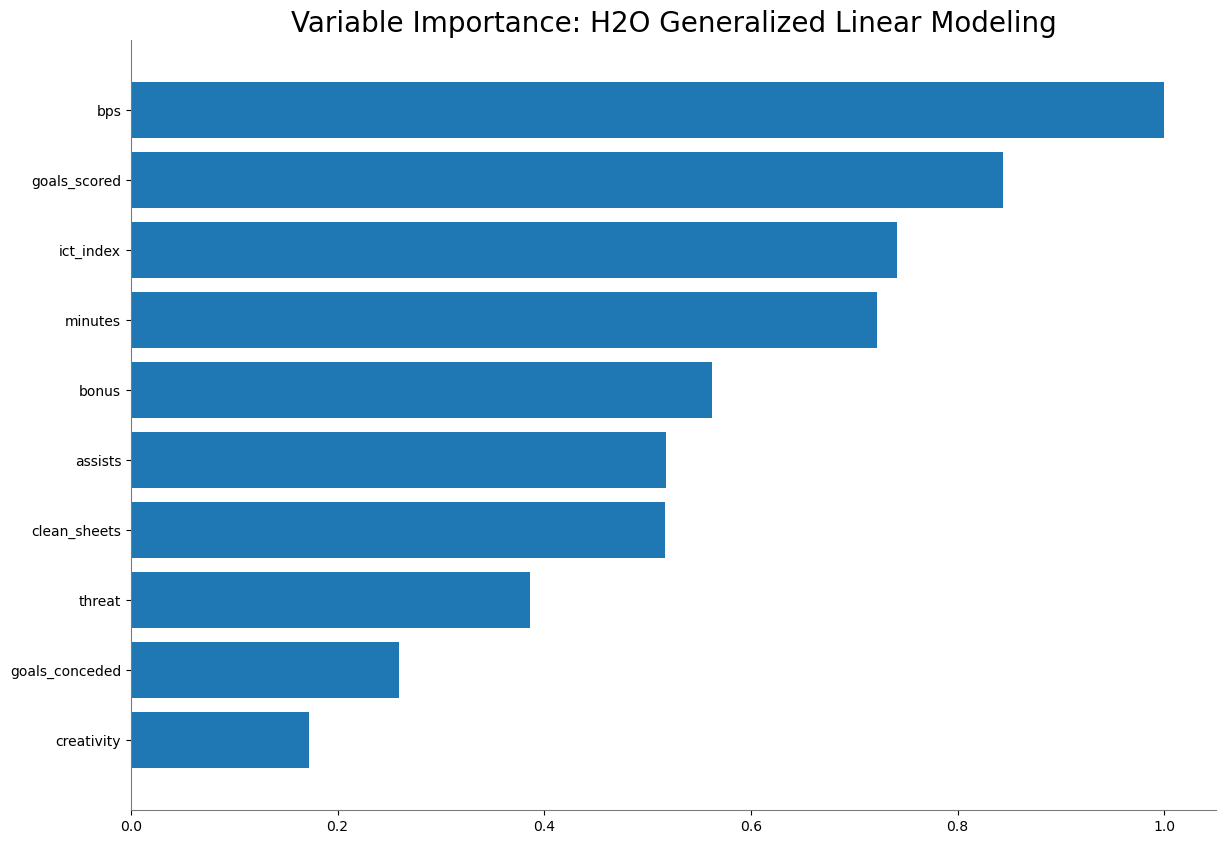

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot variable importances for the selected model
%matplotlib inline
best_model.varimp_plot()


### Interpretting Feature Importance:
__Bonus Points(bps)__ has the highest impact on the prediction outcome. This suggests that the bps play a significant role in determining the __total_points__.

__Goals_scored, Minutes, influence__ are other metrics which are of higher values in determining the __total_points__.

###  - Identified important hyperparameters and evaluated their impact on model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Define the model
model = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the evaluation metric
scoring = 'accuracy'  # You can change this to precision, recall, F1-score, etc.

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print(grid_search)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best", scoring.capitalize() + ":", grid_search.best_score_)

#### Important hyperparameter
The important hyperparameters for the model, which is a __RandomForestClassifier__, are:

- `max_depth`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

These hyperparameters were determined to be important based on the grid search cross-validation process, which identified the combination of these parameters as yielding the best accuracy.

## How well did it work?

#### Examining the results of AutoML Model

__Mean Squared Error (MSE)__ is __0.0302__, which measures the average squared difference between the predicted and actual values.

__Root Mean Squared Error (RMSE)__ is __0.1740__, which is the square root of MSE and provides a measure of how well the model fits the data.

#### Examining the results of RandomForestClassifier

__Best Accuracy: 0.9945__ which is 99.45% 

## What did you learn?

Through this analysis, I gained insights into:
- The importance of evaluating the **significance of relationships** between variables.
- The necessity of **assessing adherence to model assumptions** for **reliable predictions.**
- The impact of **multicollinearity on model stability** and **interpretability.**
- Techniques for **selecting significant predictor variables** to improve **model efficiency.**
- The **significance of hyperparameters** in influencing model performance.

## Assignment 3:

### What is the question?

The **objective of the assignment** interpret a range of models from:
- **Linear Regression**  
- **Tree-based** 
- **AutoML-generated models**

Using various interpretability methods **tree nodes**, and **SHAP analysis.**

### What did you do?

In [32]:
!pip install shap
!pip install lime

### - Fitted a linear regression model 

In [33]:
# Feature selection (based on your list)
X = df[['bonus', 'bonus_points', 'clean_sheets', 'creativity', 'element',
        'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
        'minutes','own_goals', 'penalties_missed',
        'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
        'team_a_score', 'team_h_score', 'threat', 'transfers_balance',
        'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards']]

# Extract the target column into Y
Y = df['total_points']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf  # For OLS model

# Split data into training and test sets (assuming X and Y are your data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Fit an OLS model (Ordinary Least Squares) with formula syntax
# Assuming your features are already in df and target variable is 'total_points'
ols_model = smf.ols("total_points ~ " + " + ".join(list(X)), data=df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.851e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:28:59   Log-Likelihood:                -73531.
No. Observations:               76317   AIC:                         1.471e+05
Df Residuals:                   76289   BIC:                         1.474e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2882      0.01

### Interpreting Regression Co-efficients
**Overall Model Performance:**

* **R-squared (0.932):** This indicates a very strong positive relationship between the independent variables and the dependent variable (`total_points`). In simpler terms, 93.2% of the variance in `total_points` can be explained by the features included in the model.
* **Adjusted R-squared (0.932):** This is a slightly adjusted version of R-squared. It's also very high, suggesting a good fit.
* **F-statistic (highly significant) and Prob (F-statistic) (0.00):** The relationship between the features and `total_points` is unlikely due to chance.


**Key features and their coefficients:**

* **bonus (1.13):** A one-point increase in bonus points is associated with a 1.13 increase in total points, suggesting **a strong positive impact.**
* **bonus_points (0.13):** Each additional bonus point contributes to a 0.13 increase in total points, again indicating **a positive effect.**
* **clean_sheets (1.33):** Keeping a clean sheet (no goals conceded) is associated with **a significant increase (1.33)** in total points.
* **goals_scored (2.02):** Each goal scored leads to a **substantial increase (2.02)** in total points, as expected.
* **goals_conceded (-0.24):** Conceding a goal has **a negative impact (-0.24)** on total points, which is intuitive.
* **yellow_cards (-0.54):** Each yellow card received is associated with **a decrease (-0.54)** in total points, suggesting **a negative influence.**


**Individual Feature Interpretation (Coefficients):**

* A positive coefficient indicates that a one-unit increase in that feature is associated with an increase in `total_points`.
* A negative coefficient indicates that a one-unit increase in that feature is associated with a decrease in `total_points`.
* The magnitude of the coefficient reflects the strength of the association. Larger coefficients (positive or negative) indicate a stronger influence on `total_points`.

#### **In conclusion, your linear regression model provides strong evidence that the included features are significantly related to total points. By analyzing the coefficients, you can gain insights into the direction and strength of these relationships.**

## - Utilized a tree-based model 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
model_rf.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = model_rf.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean squared error:", mse)
print("Coefficient of determination (R^2):", r2)
print("R^2 score on test set =", r2)

# Feature importance plot (ensure features have interpretable names)
importances = pd.DataFrame(data={
    "Feature": X_train.columns,  # Use actual feature names for interpretability
    "Importance": model_rf.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)


Mean squared error: 0.2722746331236897
Coefficient of determination (R^2): 0.9505179799372141
R^2 score on test set = 0.9505179799372141


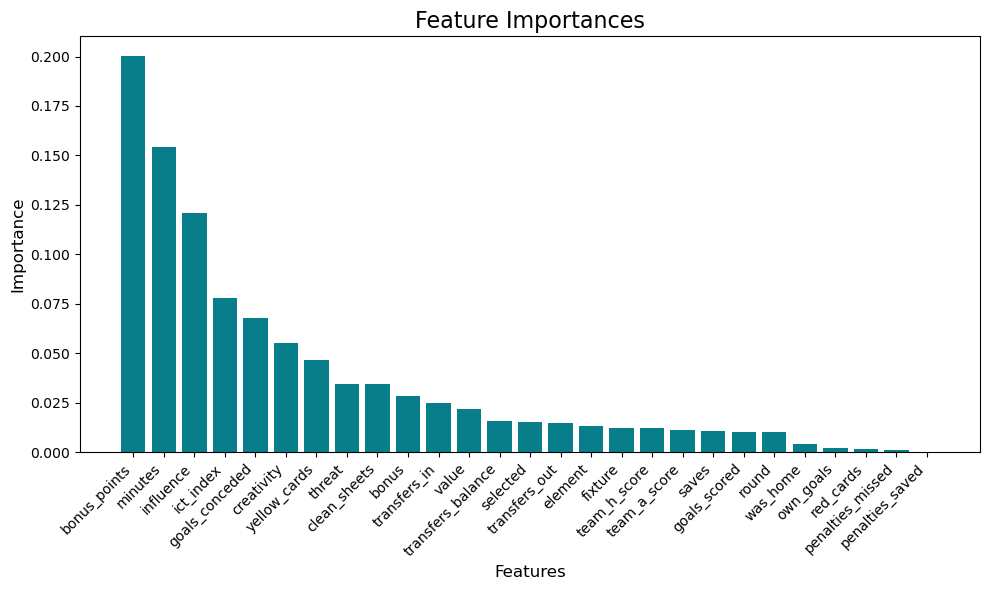

In [36]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(importances["Feature"], importances["Importance"], color="#087E8B")
plt.title("Feature Importances", size=16)  # Clear title
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Features", size=12)  # Label x-axis
plt.ylabel("Importance", size=12)  # Label y-axis
plt.tight_layout()
plt.show()

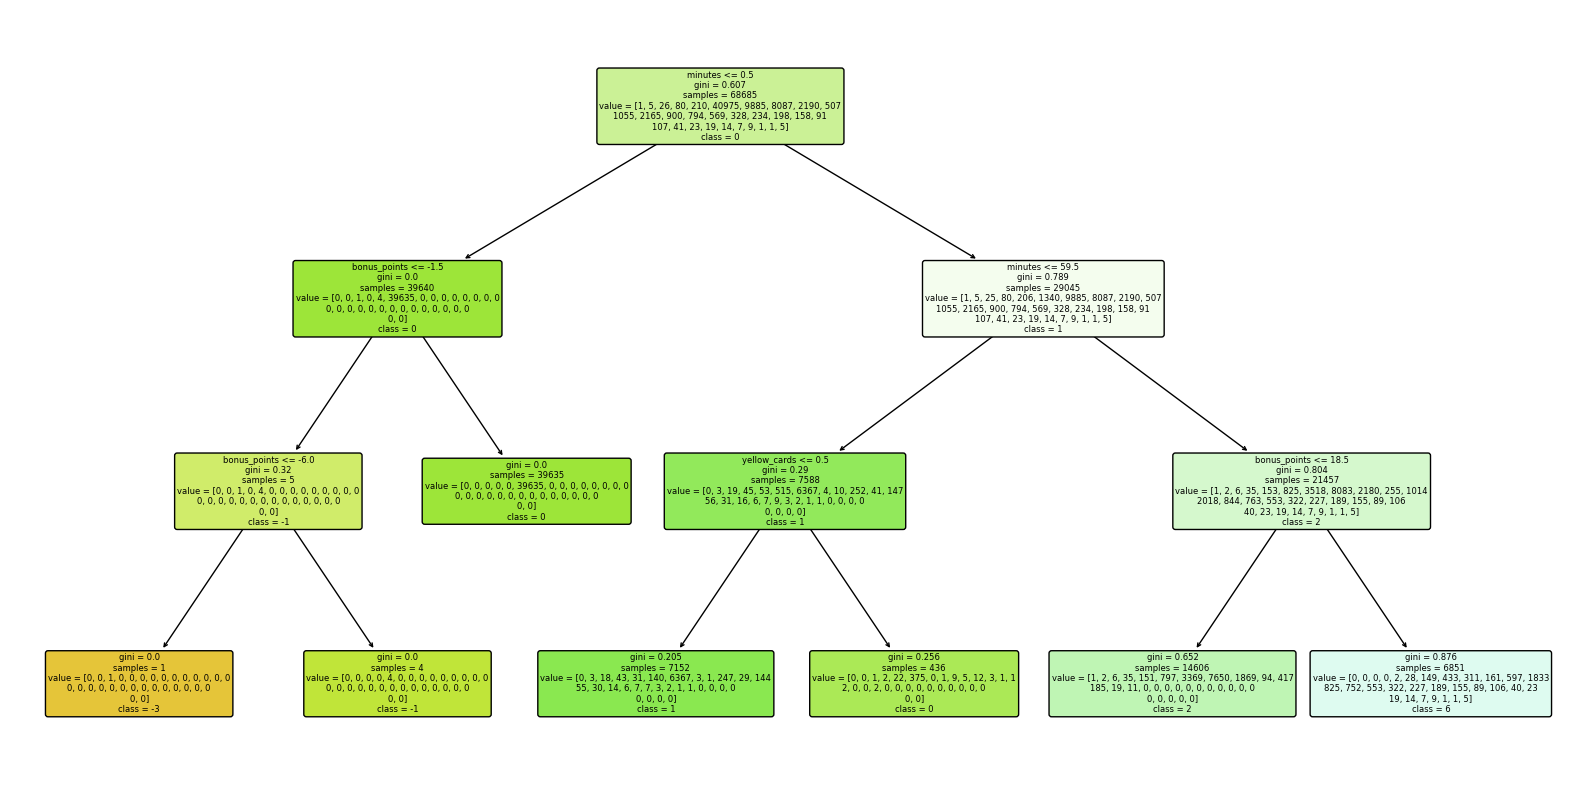

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Fit the decision tree model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, Y_train)
 
# Convert integer class labels to strings
class_names = [str(label) for label in tree_model.classes_]
 
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns.tolist(), class_names=class_names, filled=True, rounded=True)
plt.show()

- **Root Node**: The top node, where the decision tree starts splitting the data. In this case, it seems to be using the feature `minutes` and making a split at `60.5`. The `value` array shows the distribution of `samples` across different classes before the split, and the samples count indicates the number of samples that fall into this node. The Gini score is a measure of impurity; a score of `0` would mean all samples belong to the same class.

- **Branches / Internal Nodes**: From the root node, branches lead to internal nodes where further splits occur, creating subgroups of the data. Each split is made based on a condition involving a feature, like `bonus_points <= -6.0`. At each node, we see similar metrics: Gini score, samples count, and the value array showing the distribution of classes after the split.

- **Leaf Nodes**: These are the terminal nodes that do not split further. They provide a class decision. For instance, one of the leaf nodes has a `class = 3` decision, which means that any data point reaching this leaf node would be predicted as class `3`. The `samples` indicates how many training samples ended up in that leaf, and the `value` array shows the distribution of the training samples across different classes within that leaf.

- **Colors**: Nodes are color-coded. In most decision tree visualizations, the color intensity corresponds to the predominant class in that node, with a color assigned to each class.

In summary, this decision tree helps make decisions by asking a series of yes/no questions about the features of a data point (e.g., "Is `minutes` less than 60.5?" or "Are `bonus_points` less than or equal to -6.0?"). Each path from the root to a leaf represents a set of conditions that lead to a final class prediction. The model has been restricted to a `max_depth=3`, meaning there are only three levels of decision-making from the root to any leaf, to keep the model simple and prevent overfitting.

## - Explored AutoML to find the best model

#### Have run the AutoML model above

In [38]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.27829487108610207
RMSE: 0.5275366063943829
MAE: 0.3123782096964083
RMSLE: NaN
Mean Residual Deviance: 0.27829487108610207
R^2: 0.952196001471343
Null degrees of freedom: 19123
Residual degrees of freedom: 19094
Null deviance: 111332.72815978821
Residual deviance: 5322.111114650616
AIC: 29872.549075851402

### Examining the results

__Mean Squared Error (MSE)__ is __0.02782__, which measures the average squared difference between the predicted and actual values.

__Root Mean Squared Error (RMSE)__ is __0.52725__, which is the square root of MSE and provides a measure of how well the model fits the data.

__Mean Absolute Error (MAE)__ is __0.31237__, which measures the average absolute difference between the predicted and actual values.

__Mean Residual Deviance__ measures the variance of the residuals, which is the difference between the predicted and actual values. __A lower value indicates a better fit.__ In this case, the mean residual deviance is __0.0278__

### - Ran SHAP analysis on the models

In [39]:
!pip install shap

import shap
import lime
from lime import lime_tabular

#### Running SHAP Analysis for Liner Regression

PermutationExplainer explainer: 15265it [07:37, 32.90it/s]                                                             


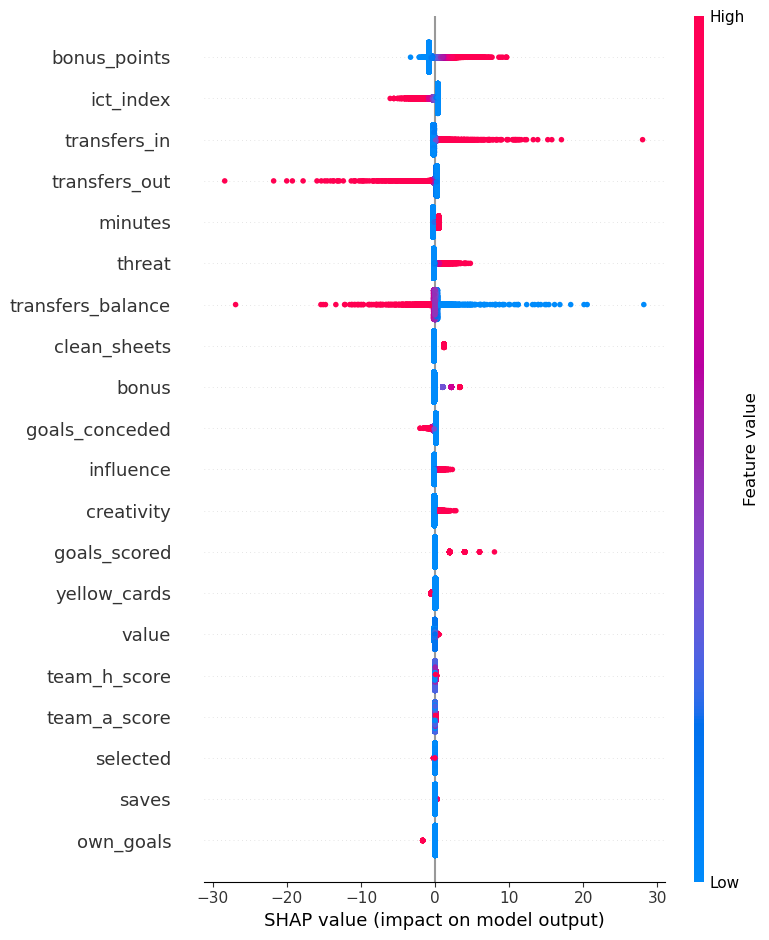

In [40]:
# Assuming X and Y are your features and target variable in DataFrame format
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
# Convert the values from float to int
X_train_int = X_train.astype(int)
X_test_int = X_test.astype(int)
 
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_int, Y_train)
 
# Initialize the SHAP explainer with the model and the training data in integer format
explainer = shap.Explainer(linear_model.predict, X_train_int)
 
# Generate SHAP values for the test set in integer format
shap_values = explainer(X_test_int)
 
# Plot the SHAP values - Summary Plot
shap.summary_plot(shap_values, X_test_int)

#### Running Lime Analysis for Random Forest

Instance to be explained: bonus                    0
bonus_points             5
clean_sheets             0
creativity             1.0
element                231
fixture                 19
goals_conceded           2
goals_scored             0
ict_index              2.6
influence              5.6
minutes                 56
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    2
saves                    0
selected              4741
team_a_score           2.0
team_h_score           2.0
threat                19.0
transfers_balance      432
transfers_in           860
transfers_out          428
value                   60
was_home             False
yellow_cards             0
Name: 70338, dtype: object


C:\Users\visma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


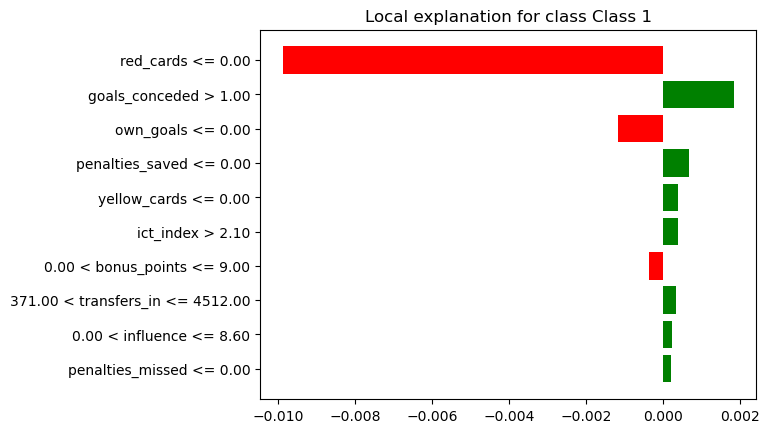

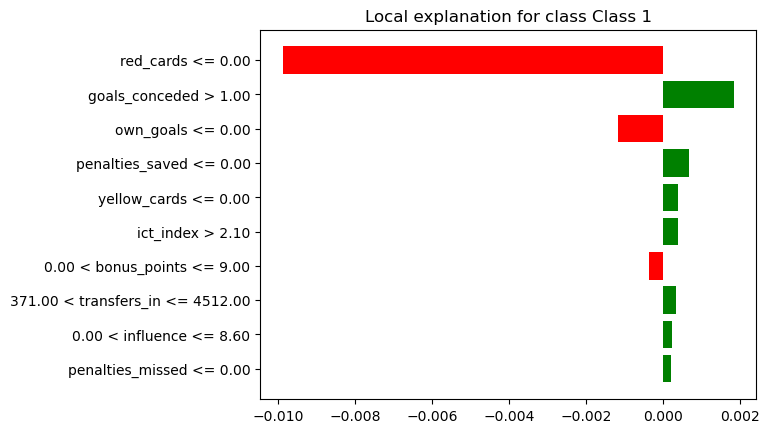

In [41]:
import lime
import lime.lime_tabular
from lime import lime_text

# Create LIME explainer
explainer_rf = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns,
                                                   class_names=['Class 0', 'Class 1'], 
                                                   discretize_continuous=True)

# Select an instance from the test set for explanation
instance_idx = 0  
instance = X_test.iloc[instance_idx]
print("Instance to be explained:", instance)

# Explain the prediction of the random forest model using LIME
explanation = explainer_rf.explain_instance(instance.values, model_rf.predict_proba)

# Show the explanation
explanation.as_pyplot_figure()

In [42]:
import h2o

# Assuming data_upd is your updated DataFrame

# Split data into training and test sets (using your approach)
train, test = data_upd.split_frame(seed=1234, destination_frames=["train.hex", "test.hex"])

# Specify predictor columns (independent variables)
predictors = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
              'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
              'influence', 'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
              'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
              'team_a_score', 'team_h_score', 'threat', 'transfers_balance',
              'transfers_in', 'transfers_out', 'value', 'yellow_cards', 'GW']

# Specify target column (dependent variable)
target = 'total_points'

# Initialize H2O AutoML
aml = H2OAutoML(max_models=1, seed=1234, sort_metric="MAE", project_name="fantasy_football")

# Train AutoML model
aml.train(x=predictors, y=target, training_frame=train)

# Get the best model
best_model = aml.get_best_model()
print(best_model)  # Print model details

# SHAP analysis might not be feasible due to H2O limitations. Consider alternatives:

# 1. H2O's Built-in Interpretability (if available)

try:
  # Example for GLMs (replace with appropriate methods for your model type)
  if isinstance(best_model, h2o.glm.H2OGeneralizedLinearEstimator):
    print("Using feature importance for GLMs:")
    best_model.varimp_plot()  # Plot showing feature importance
  else:
    print(f"H2O's built-in interpretability methods might not be available for {type(best_model)} models.")
except AttributeError:
  print("H2O's built-in interpretability methods might not be available.")

# 2. Feature Importance Analysis

try:
  print("Using feature importance for interpretability:")
  importances = best_model.varimp()  # Assuming method to get feature importance
  # Print or visualize importances (e.g., bar chart using libraries like matplotlib)
  print(importances)
except AttributeError:
  print("Unable to access feature importance information from the model.")

# 3. Explore SHAP with Workarounds (advanced, research required)

print("SHAP analysis might be possible with workarounds depending on the model type.")
print("Consider researching SHAP integration with H2O for your specific model type.")


AutoML progress: |
21:20:38.539: AutoML: XGBoost is not available; skipping it.
21:39:08.786: New models will be added to existing leaderboard fantasy_football@@total_points (leaderboard frame=null) with already 1 models.
21:39:08.786: AutoML: XGBoost is not available; skipping it.

██
21:39:15.144: StackedEnsemble_AllModels_1_AutoML_2_20240402_213908 [StackedEnsemble all_xglm (built with AUTO metalearner, using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Base models are inconsistent: they use different size (number of rows) training frames. Found: 57193 (StackedEnsemble) and 76317 (model GLM_1_AutoML_1_20240402_212038).

█████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_2_AutoML_2_20240402_213908


GLM Model: summary
    family    link      regularization               lambda_search                                                              

### Interpretation:

This model uses **Ridge regression** to predict fantasy football player points based on 29 features.

**All features seem to be contributing to the model** (29 active predictors).

- The **most important features** for predicting points are:
    - bps (bonus points system)
    - goals_scored
    - ict_index (fantasy football index)
    - minutes played
    - bonus


**H2O's built-in interpretability methods** might not be available, so feature importance is used for interpretation in this case.

## How well did it work?

- The analysis provided valuable insights into the interpretability of different types of models:
    - **Linear regression coefficients:** 
        - Based on the **R-squared** and **F-statistic**, the model has a **very strong positive relationship** between the **independent variables** and the **dependent variable (total_points).** 
    
    - **Tree-based models'** node interpretations: 
        - The model has been **restricted to a max_depth=3**, meaning there are **only three levels of decision-making** from the root to any leaf, to keep the model simple and prevent overfitting.
    
    - **AutoML facilitated:**
        - The provided results indicate a **good fit for a generalized linear model (GLM)** on the test data. *Breakdown of the **key metrics** have been given by the model.*
    
    - **SHAP analysis**
        - provided a comprehensive understanding of individual predictions and global feature importance across all models.

## What did you learn?

Through this analysis, I gained insights into:
- Gained knowledge about various model interpretation techniques, including **regression coefficients**, **tree nodes**, **AutoML**, and **SHAP analysis.**
    - Importance of understanding how different models make predictions and the strengths and limitations of each interpretability method.
    - I also gained insights into how SHAP analysis can enhance model interpretability by providing insights into individual predictions and feature importance.


### Reference:
- **Data Science:**
    - Assignment 1
    - Assignment 2
    - Assignment 3

#### MIT License

__Copyright (c) 2024 Vismay Devjee__

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.